(use_plotcollection)=
# Using `PlotCollection` objects

This tutorial covers handling {class}`~arviz_plots.PlotCollection`: what are its main attributes and methods, how can it be modified... and
won't focus on `PlotCollection` creation.

Consequently, this should not be the first time you are hearing about `PlotCollection`. If it were, we recommend first going over either one of the following two pages:

* {ref}`plots_intro` which introduces the "batteries-included" functions. That is, functions that take data following the InferenceData schema and generate a specific type of plot, using an opinionated and pre-defined set of defaults. All these functions return a `PlotCollection` object.
* {ref}`compose_own_plot` which focuses on `PlotCollection` creation and different strategies that might be followed to generate/fill the {term}`chart` and all its {term}`plots`.

## `PlotCollection` attributes

### `viz`: organized storage of plotting backend objects
The {attr}`.viz <.PlotCollection.viz>` attribute contains _most of_ the elements that comprise the visualization itself: the {term}`chart`, {term}`plots` and {term}`artists`.

"most of" because while the {term}`chart` and {term}`plot` elements are created _directly_ by methods of `PlotCollection` like {meth}`~.PlotCollection.grid` or 
{meth}`~.PlotCollection.wrap`, {term}`artists` are created by external functions executed through `PlotCollection` as many times as needed on the indicated {term}`plots`,
and some of these functions might not return an object from the plotting backend library to store.

In [1]:
from arviz_base import load_arviz_data
idata = load_arviz_data("rugby")

In [2]:
from arviz_plots import plot_dist, plot_forest, plot_trace_dist, style
style.use("arviz-variat")

ArviZ plotting functions aim to store as many artists as possible, this makes all artists available to users and to allow further customization after the function has been called.
Let's see what are the contents of the `PlotCollection` returned by {func}`~arviz_plots.plot_dist`:

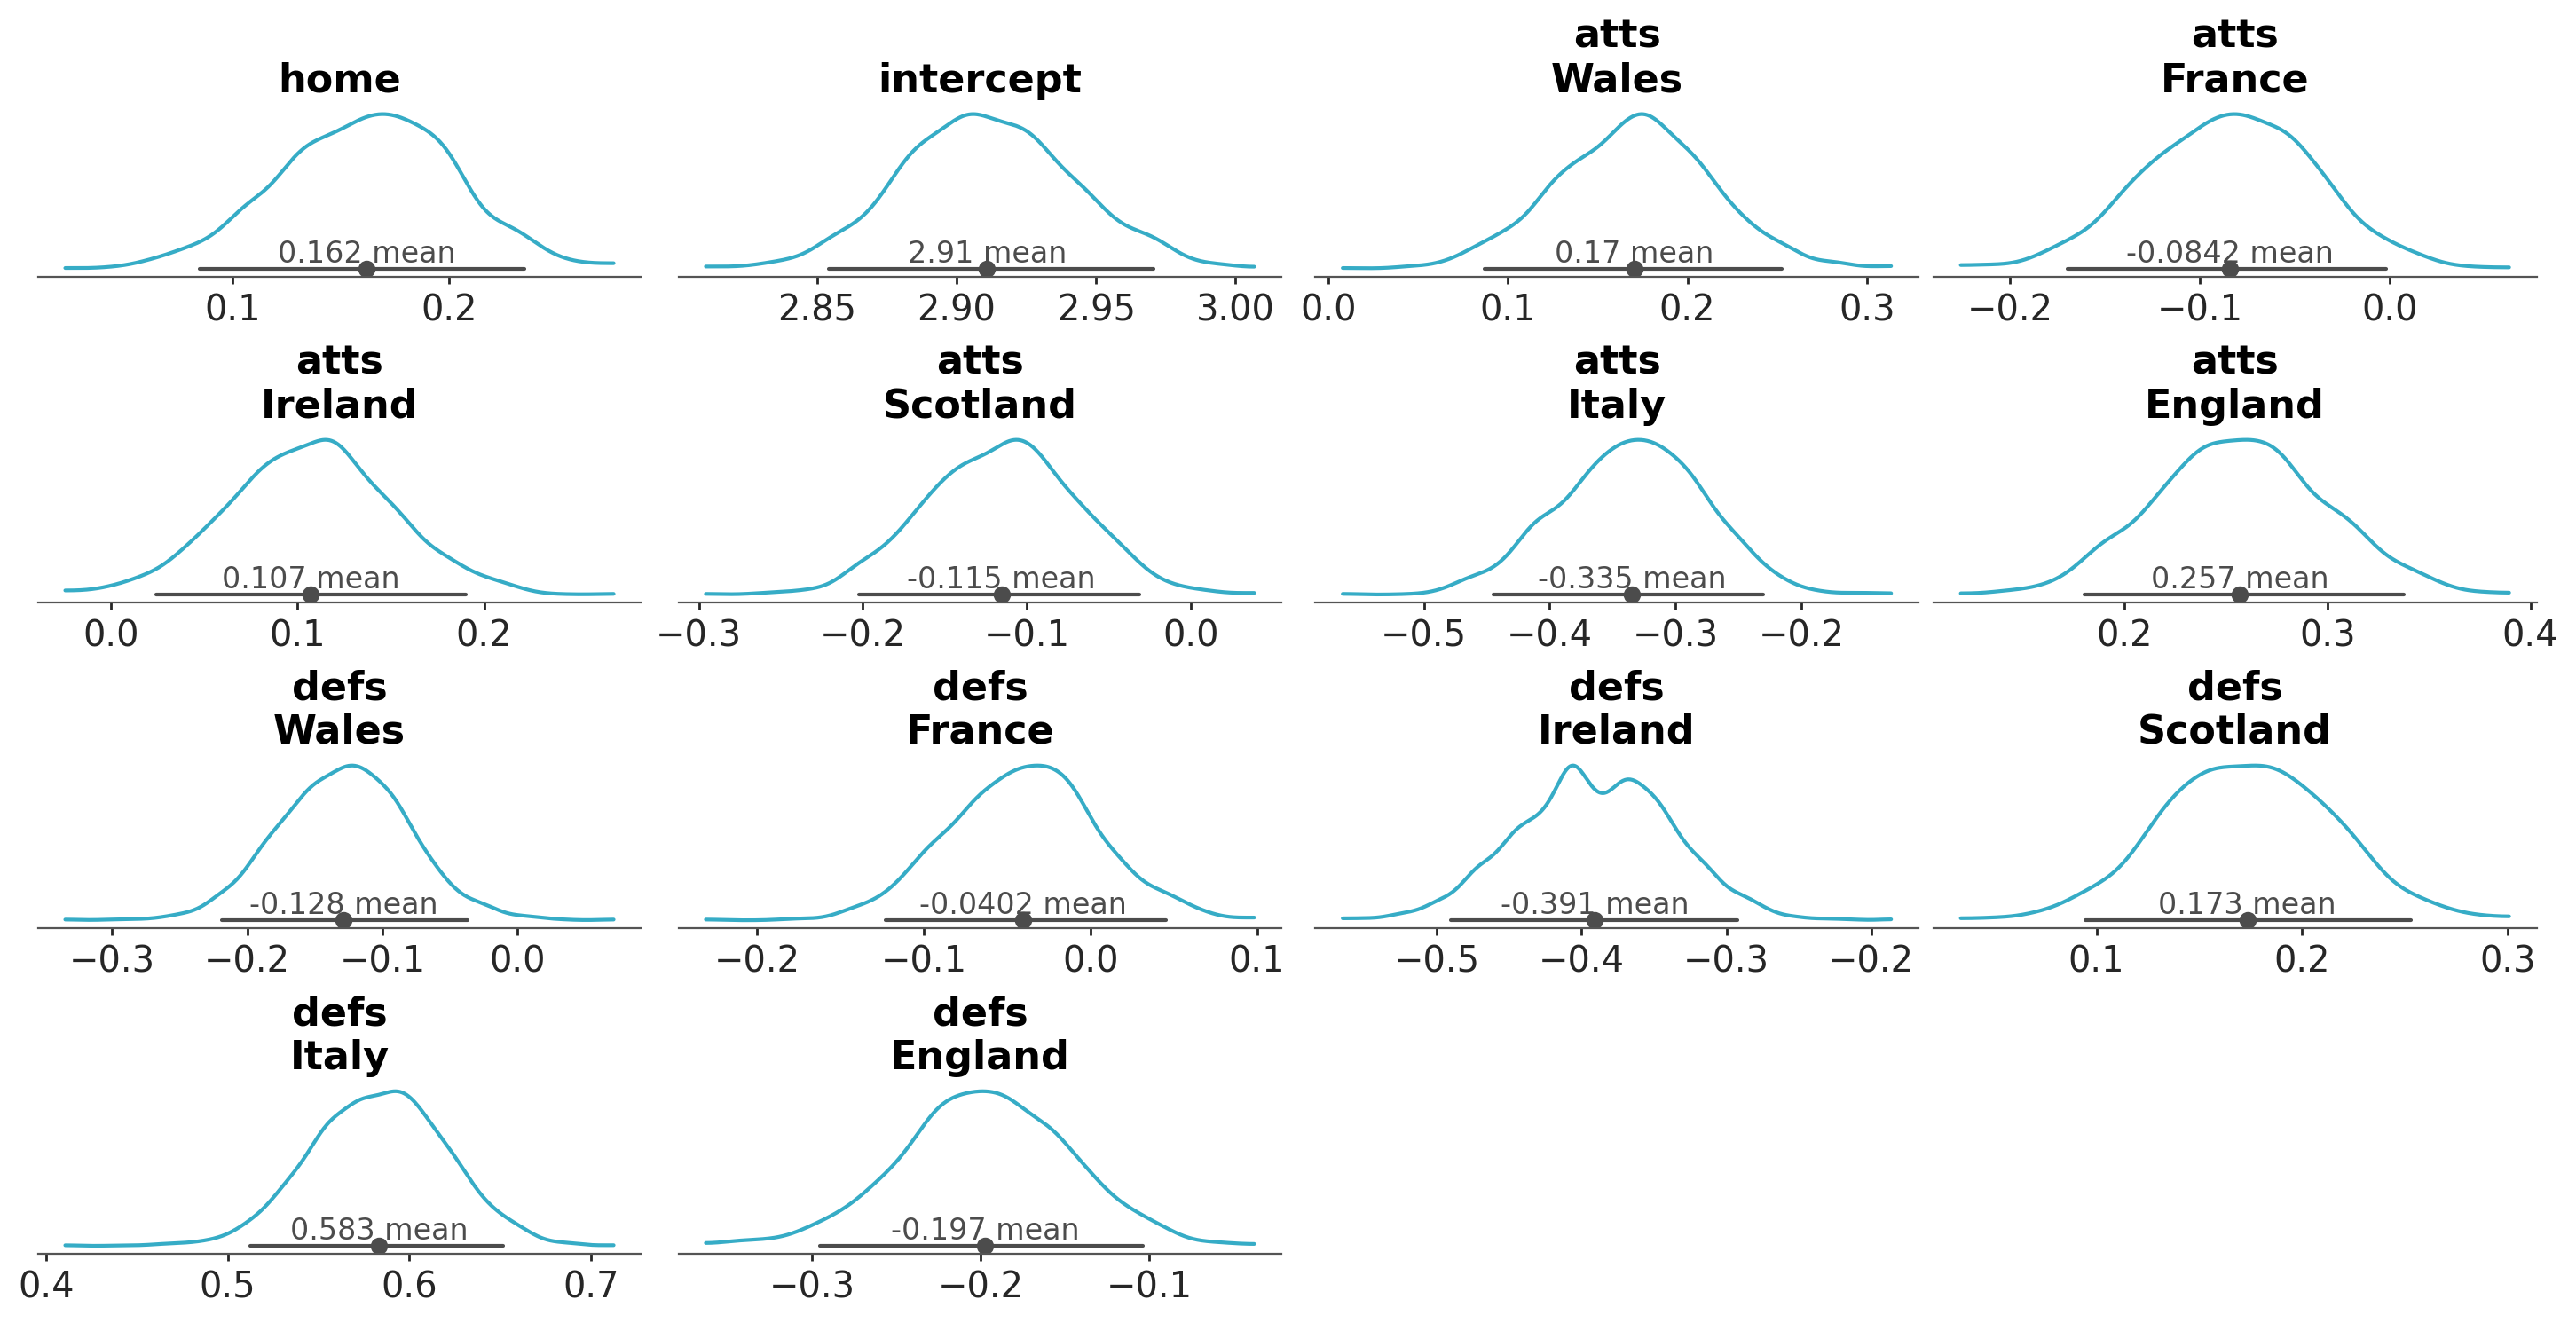

In [3]:
pc = plot_dist(idata, var_names=["home", "intercept", "atts", "defs"])

In [4]:
pc.viz

<xarray.DataTree>
Group: /
│   Dimensions:  ()
│   Data variables:
│       chart    object 8B Figure(2880x1468.27)
├── Group: /plot
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B Axes(0.0107484,0.795216;0.236051x0.130683)
│           intercept  object 8B Axes(0.261407,0.795216;0.236051x0.130683)
│           atts       (team) object 48B Axes(0.510618,0.795216;0.236051x0.130683) .....
│           defs       (team) object 48B Axes(0.0107484,0.295216;0.236051x0.130683) ....
├── Group: /row_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 0
│           atts       (team) int64 48B 0 0 1 1 1 1
│           defs       (team) int64 48B 2 2 2 2 3 3
├── Group: /col_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 1
│           atts       (team) int64 48B 2 3 0 1 2 3
│           defs       (team) int64 48B 0 1 2 3 0 1
...
├── Group: /point_estimate
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B <matplotlib.collections.PathCollection object at 0x7...
│           intercept  object 8B <matplotlib.collections.PathCollection object at 0x7...
│           atts       (team) object 48B <matplotlib.collections.PathCollection objec...
│           defs       (team) object 48B <matplotlib.collections.PathCollection objec...
│       Attributes:
│           ignore_aes:  set()
├── Group: /point_estimate_text
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B Text(0.162016509814486, 0.9577840727794782, '0.162 m...
│           intercept  object 8B Text(2.9108943547607997, 1.267474020711413, '2.91 me...
│           atts       (team) object 48B Text(0.1704484929621235, 0.9551953057416148,...
│           defs       (team) object 48B Text(-0.1284704097033847, 0.817180174976101,...
│       Attributes:
│           ignore_aes:  set()
└── Group: /title
        Dimensions:    (team: 6)
        Coordinates:
          * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
        Data variables:
            home       object 8B Text(0.5, 1.0, 'home')
            intercept  object 8B Text(0.5, 1.0, 'intercept')
            atts       (team) object 48B Text(0.5, 1.0, 'atts\nWales') ... Text(0.5, ...
            defs       (team) object 48B Text(0.5, 1.0, 'defs\nWales') ... Text(0.5, ...
        Attributes:
            ignore_aes:  set()

As you can see by inspecting the HTML interactive view right above, the `.viz` attribute is a {class}`.DataTree` with 4 groups, as many groups as data variables.
With each group having the following elements:

* `plot`: the backend objects that correspond to the {term}`plot` elements.
* `row` and `col`: integer indicators of the row and colum each {term}`plot` occupies within the {term}`chart`
* `kde`, `credible_interval`, `point_estimate`, `point_estimate_text` and `title`: the {term}`artists` corresponding respectively to: the KDE line (blue line), credible interval line (gray horizontal line), the point estimate dot (gray circle), the point estimate annotation (gray text over the point estimate) and the title (in bolded black font over each plot).

These artist variables storing backend objects can have different shapes between them and the same artist variable can have different shapes between groups/data variables.

Moreover, there is a global `chart` variable which is always a scalar.

:::{important}
The **structure** of the `.viz` attribute is backend agnostic, but its **contents** are backend dependent.
:::

Here we have generated the plot with `matplotlib` so the objects stored are `matplotlib` objects like {class}`~matplotlib.figure.Figure`, {class}`~matplotlib.axes.Axes`, {class}`~matplotlib.lines.Line2D` or {class}`~matplotlib.text.Text`.

However, if we generate the plot with `bokeh` (like below) the objects stored will be `bokeh` objects like {class}`~bokeh.models.Column`, {class}`~bokeh.plotting.Figure`, {class}`~bokeh.models.renderers.GlyphRenderer` or {class}`~bokeh.models.annotations.Title`.

In [5]:
pc = plot_dist(idata, backend="bokeh")
pc.viz

<xarray.DataTree>
Group: /
│   Dimensions:  ()
│   Data variables:
│       chart    object 8B GridPlot(id='p1960', ...)
├── Group: /plot
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B figure(id='p1001', ...)
│           intercept  object 8B figure(id='p1035', ...)
│           atts_star  (team) object 48B figure(id='p1069', ...) ... figure(id='p1239...
│           defs_star  (team) object 48B figure(id='p1273', ...) ... figure(id='p1443...
│           sd_att     object 8B figure(id='p1477', ...)
│           sd_def     object 8B figure(id='p1511', ...)
│           atts       (team) object 48B figure(id='p1545', ...) ... figure(id='p1715...
│           defs       (team) object 48B figure(id='p1749', ...) ... figure(id='p1919...
├── Group: /row_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 0
│           atts_star  (team) int64 48B 0 0 1 1 1 1
│           defs_star  (team) int64 48B 2 2 2 2 3 3
│           sd_att     int64 8B 3
│           sd_def     int64 8B 3
│           atts       (team) int64 48B 4 4 4 4 5 5
│           defs       (team) int64 48B 5 5 6 6 6 6
├── Group: /col_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 1
│           atts_star  (team) int64 48B 2 3 0 1 2 3
│           defs_star  (team) int64 48B 0 1 2 3 0 1
│           sd_att     int64 8B 2
│           sd_def     int64 8B 3
│           atts       (team) int64 48B 0 1 2 3 0 1
│           defs       (team) int64 48B 2 3 0 1 2 3
...
├── Group: /point_estimate
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B GlyphRenderer(id='p2475', ...)
│           intercept  object 8B GlyphRenderer(id='p2487', ...)
│           atts_star  (team) object 48B GlyphRenderer(id='p2499', ...) ... GlyphRend...
│           defs_star  (team) object 48B GlyphRenderer(id='p2571', ...) ... GlyphRend...
│           sd_att     object 8B GlyphRenderer(id='p2643', ...)
│           sd_def     object 8B GlyphRenderer(id='p2655', ...)
│           atts       (team) object 48B GlyphRenderer(id='p2667', ...) ... GlyphRend...
│           defs       (team) object 48B GlyphRenderer(id='p2739', ...) ... GlyphRend...
├── Group: /point_estimate_text
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B GlyphRenderer(id='p2808', ...)
│           intercept  object 8B GlyphRenderer(id='p2817', ...)
│           atts_star  (team) object 48B GlyphRenderer(id='p2826', ...) ... GlyphRend...
│           defs_star  (team) object 48B GlyphRenderer(id='p2880', ...) ... GlyphRend...
│           sd_att     object 8B GlyphRenderer(id='p2934', ...)
│           sd_def     object 8B GlyphRenderer(id='p2943', ...)
│           atts       (team) object 48B GlyphRenderer(id='p2952', ...) ... GlyphRend...
│           defs       (team) object 48B GlyphRenderer(id='p3006', ...) ... GlyphRend...
└── Group: /title
        Dimensions:    (team: 6)
        Coordinates:
          * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
        Data variables:
            home       object 8B Title(id='p3054', ...)
            intercept  object 8B Title(id='p3055', ...)
            atts_star  (team) object 48B Title(id='p3056', ...) ... Title(id='p3061',...
            defs_star  (team) object 48B Titl

If instead we inspect the `PlotCollection` returned by {func}`~arviz_plots.plot_forest` we'll see there are different artists stored,
and in that case too, as all variables are in the same {term}`plot` as they are differenced by their `y` coordinate the `plot`, `row` and `col` variables
are now global, as they are shared by all variables. Moreover, we also now have different shapes for different artists within the same variable
as well as different shapes for the same artist among different variables.

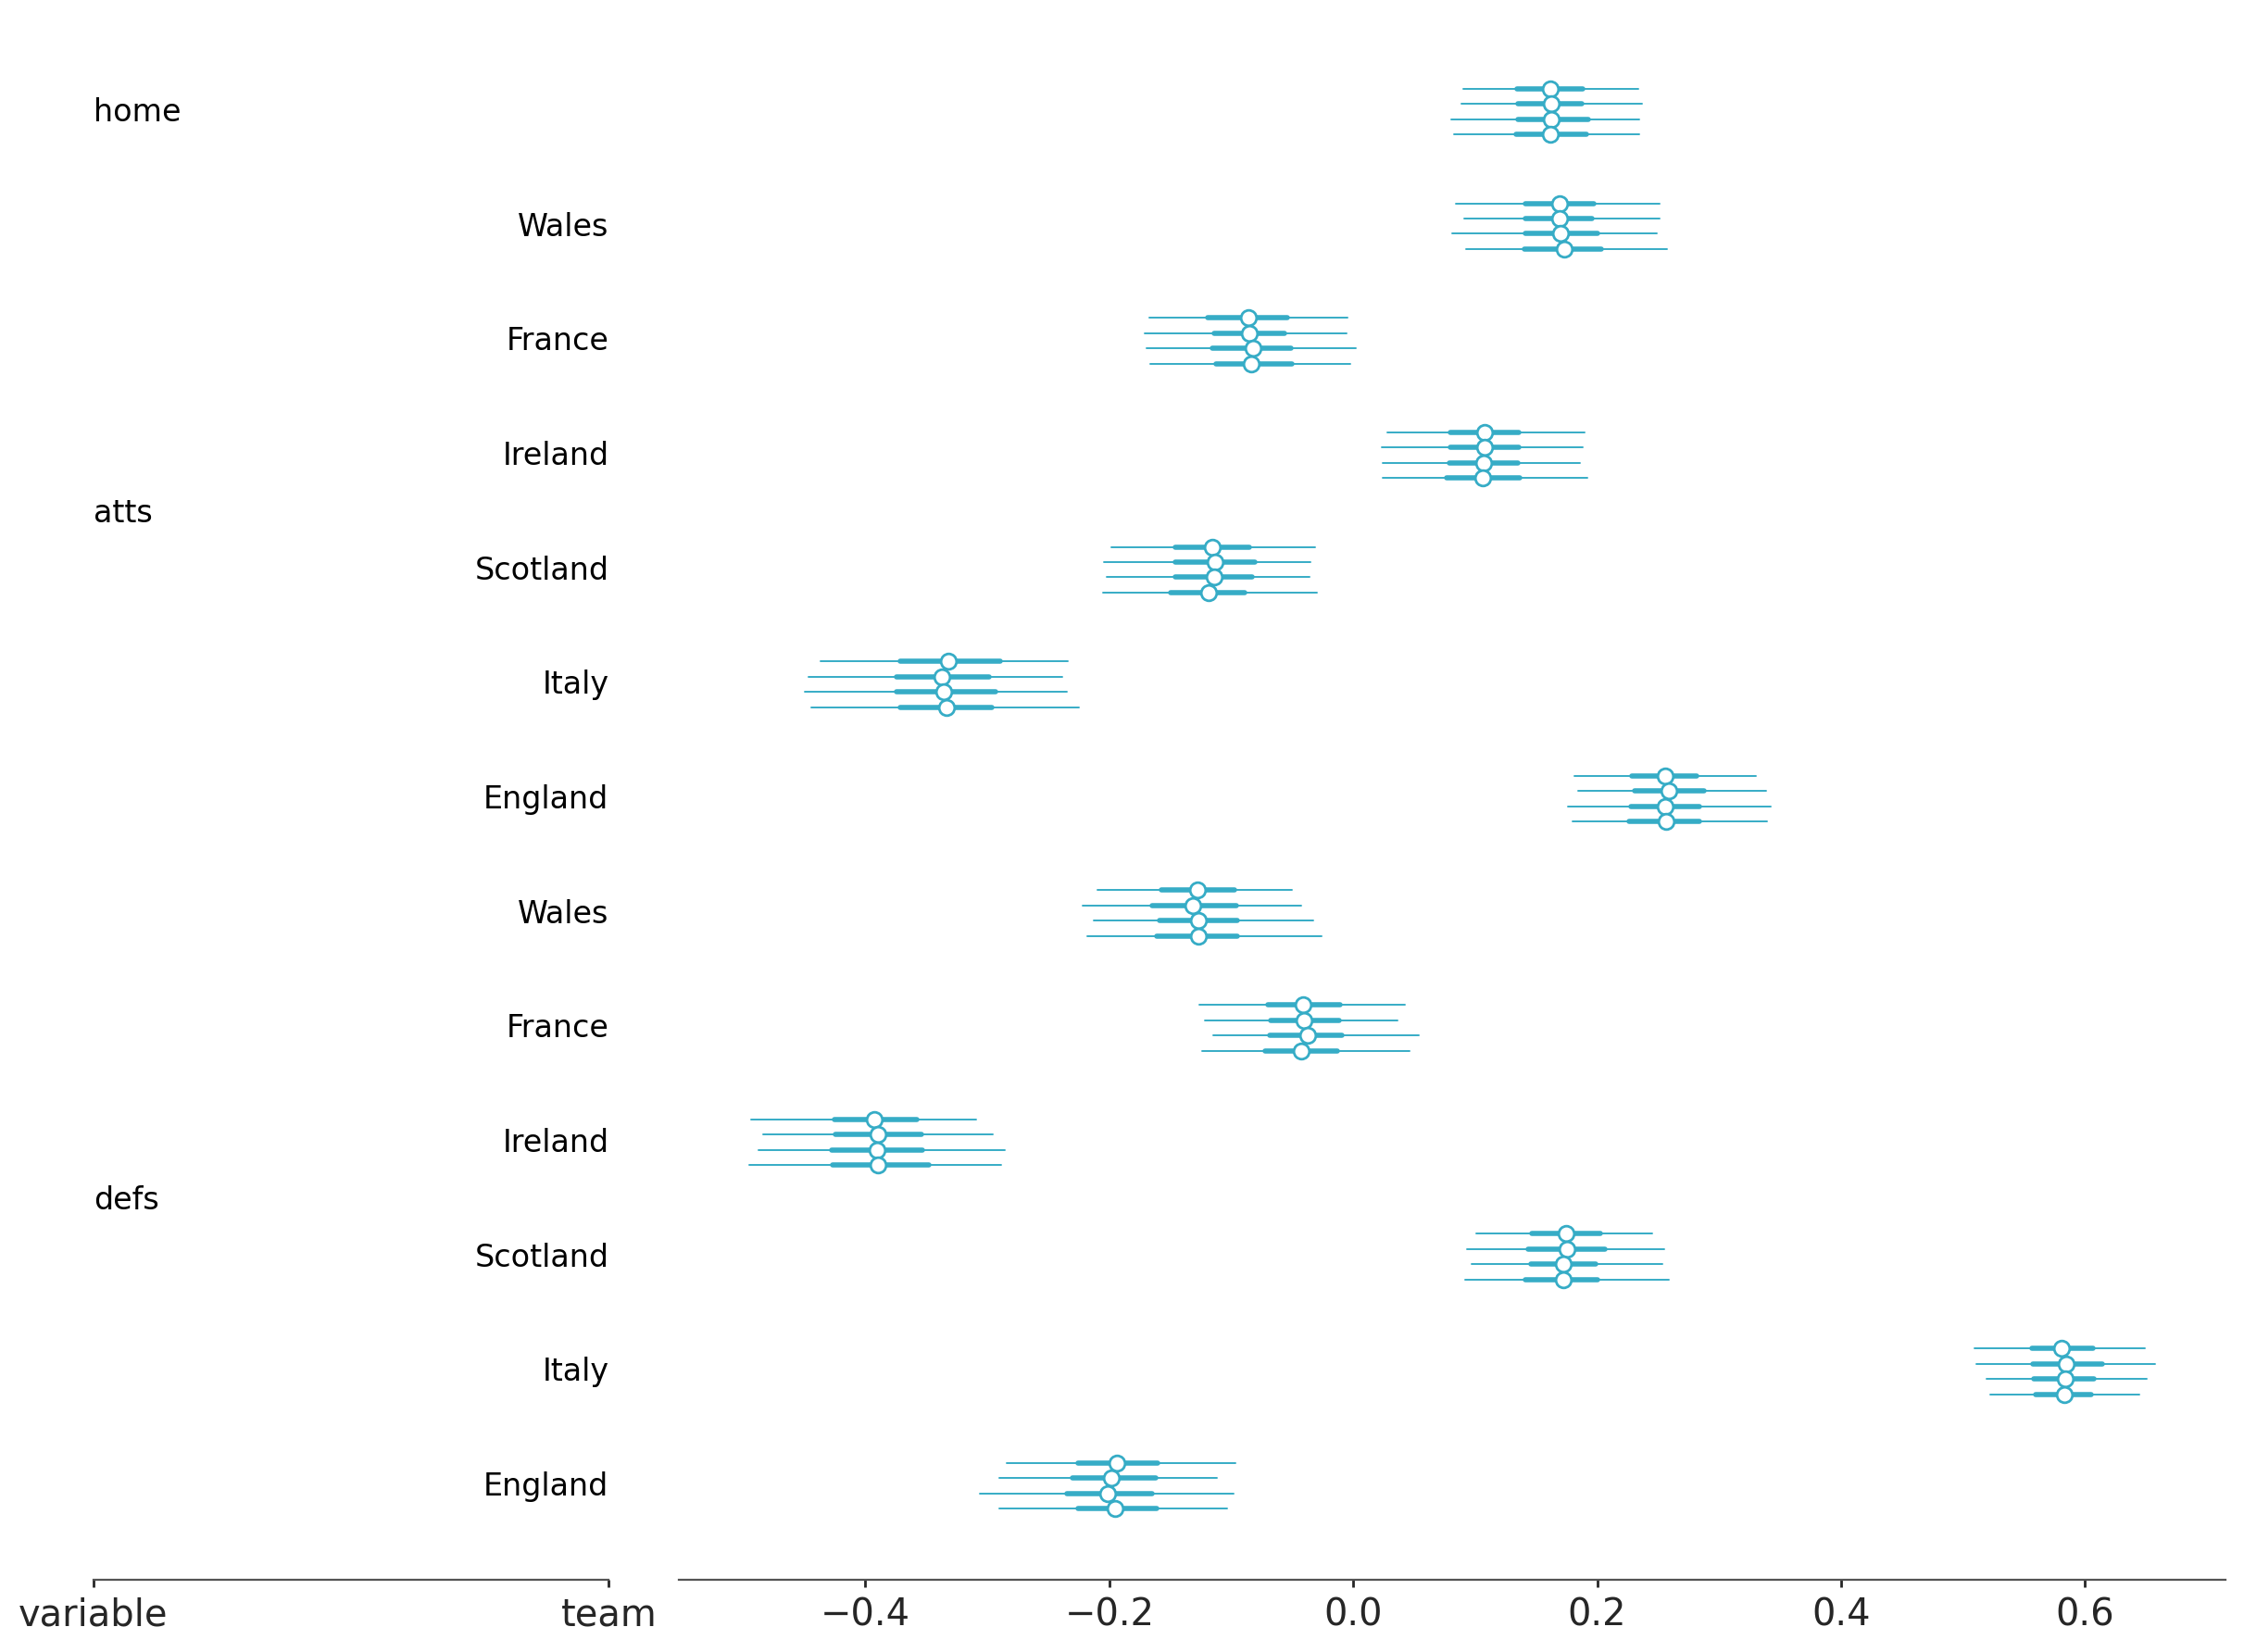

In [6]:
pc = plot_forest(idata, var_names=["home", "atts", "defs"])

In [7]:
pc.viz

<xarray.DataTree>
Group: /
│   Dimensions:    (column: 2)
│   Coordinates:
│     * column     (column) <U6 48B 'labels' 'forest'
│   Data variables:
│       chart      object 8B Figure(2400x1761.48)
│       plot       (column) object 16B Axes(0.0371183,0.0376897;0.231949x0.957579...
│       row_index  (column) int64 16B 0 0
│       col_index  (column) int64 16B 0 1
├── Group: /variable_label
│       Dimensions:  ()
│       Data variables:
│           home     object 8B Text(0, 11.8, 'home')
│           atts     object 8B Text(0, 8.3, 'atts')
│           defs     object 8B Text(0, 2.3000000000000007, 'defs')
├── Group: /team_label
│       Dimensions:  (team: 6)
│       Coordinates:
│         * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home     object 8B Text(1, 11.8, '')
│           atts     (team) object 48B Text(1, 10.8, 'Wales') ... Text(1, 5.800000000...
│           defs     (team) object 48B Text(1, 4.800000000000001, 'Wales') ... Text(1...
├── Group: /twig
│       Dimensions:  (chain: 4, team: 6)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home     (chain) object 32B Line2D(_child0) ... Line2D(_child3)
│           atts     (chain, team) object 192B Line2D(_child4) ... Line2D(_child27)
│           defs     (chain, team) object 192B Line2D(_child28) ... Line2D(_child51)
├── Group: /trunk
│       Dimensions:  (chain: 4, team: 6)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home     (chain) object 32B Line2D(_child52) ... Line2D(_child55)
│           atts     (chain, team) object 192B Line2D(_child56) ... Line2D(_child79)
│           defs     (chain, team) object 192B Line2D(_child80) ... Line2D(_child103)
└── Group: /point_estimate
        Dimensions:  (chain: 4, team: 6)
        Coordinates:
          * chain    (chain) int64 32B 0 1 2 3
          * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
        Data variables:
            home     (chain) object 32B <matplotlib.collections.PathCollection object...
            atts     (chain, team) object 192B <matplotlib.collections.PathCollection...
            defs     (chain, team) object 192B <matplotlib.collections.PathCollection...

### `aes`: mapping of aesthetic keys to values and storage all at once
The other main attribute of `PlotCollection` is {attr}`.aes <.PlotCollection.aes>`. It is also a {class}`~.DataTree` and it has a similar structure, with data variables being groups,
but instead of storing plotted objects it stores {term}`aesthetic mapping` as key-value pairs. This allows us to check what properties are being used
that are specific to the different visual elements depending on the coordinate values they represent, to access them for further plotting, or
even in more advanced cases, to manually modify some of them before calling (more) plotting functions.

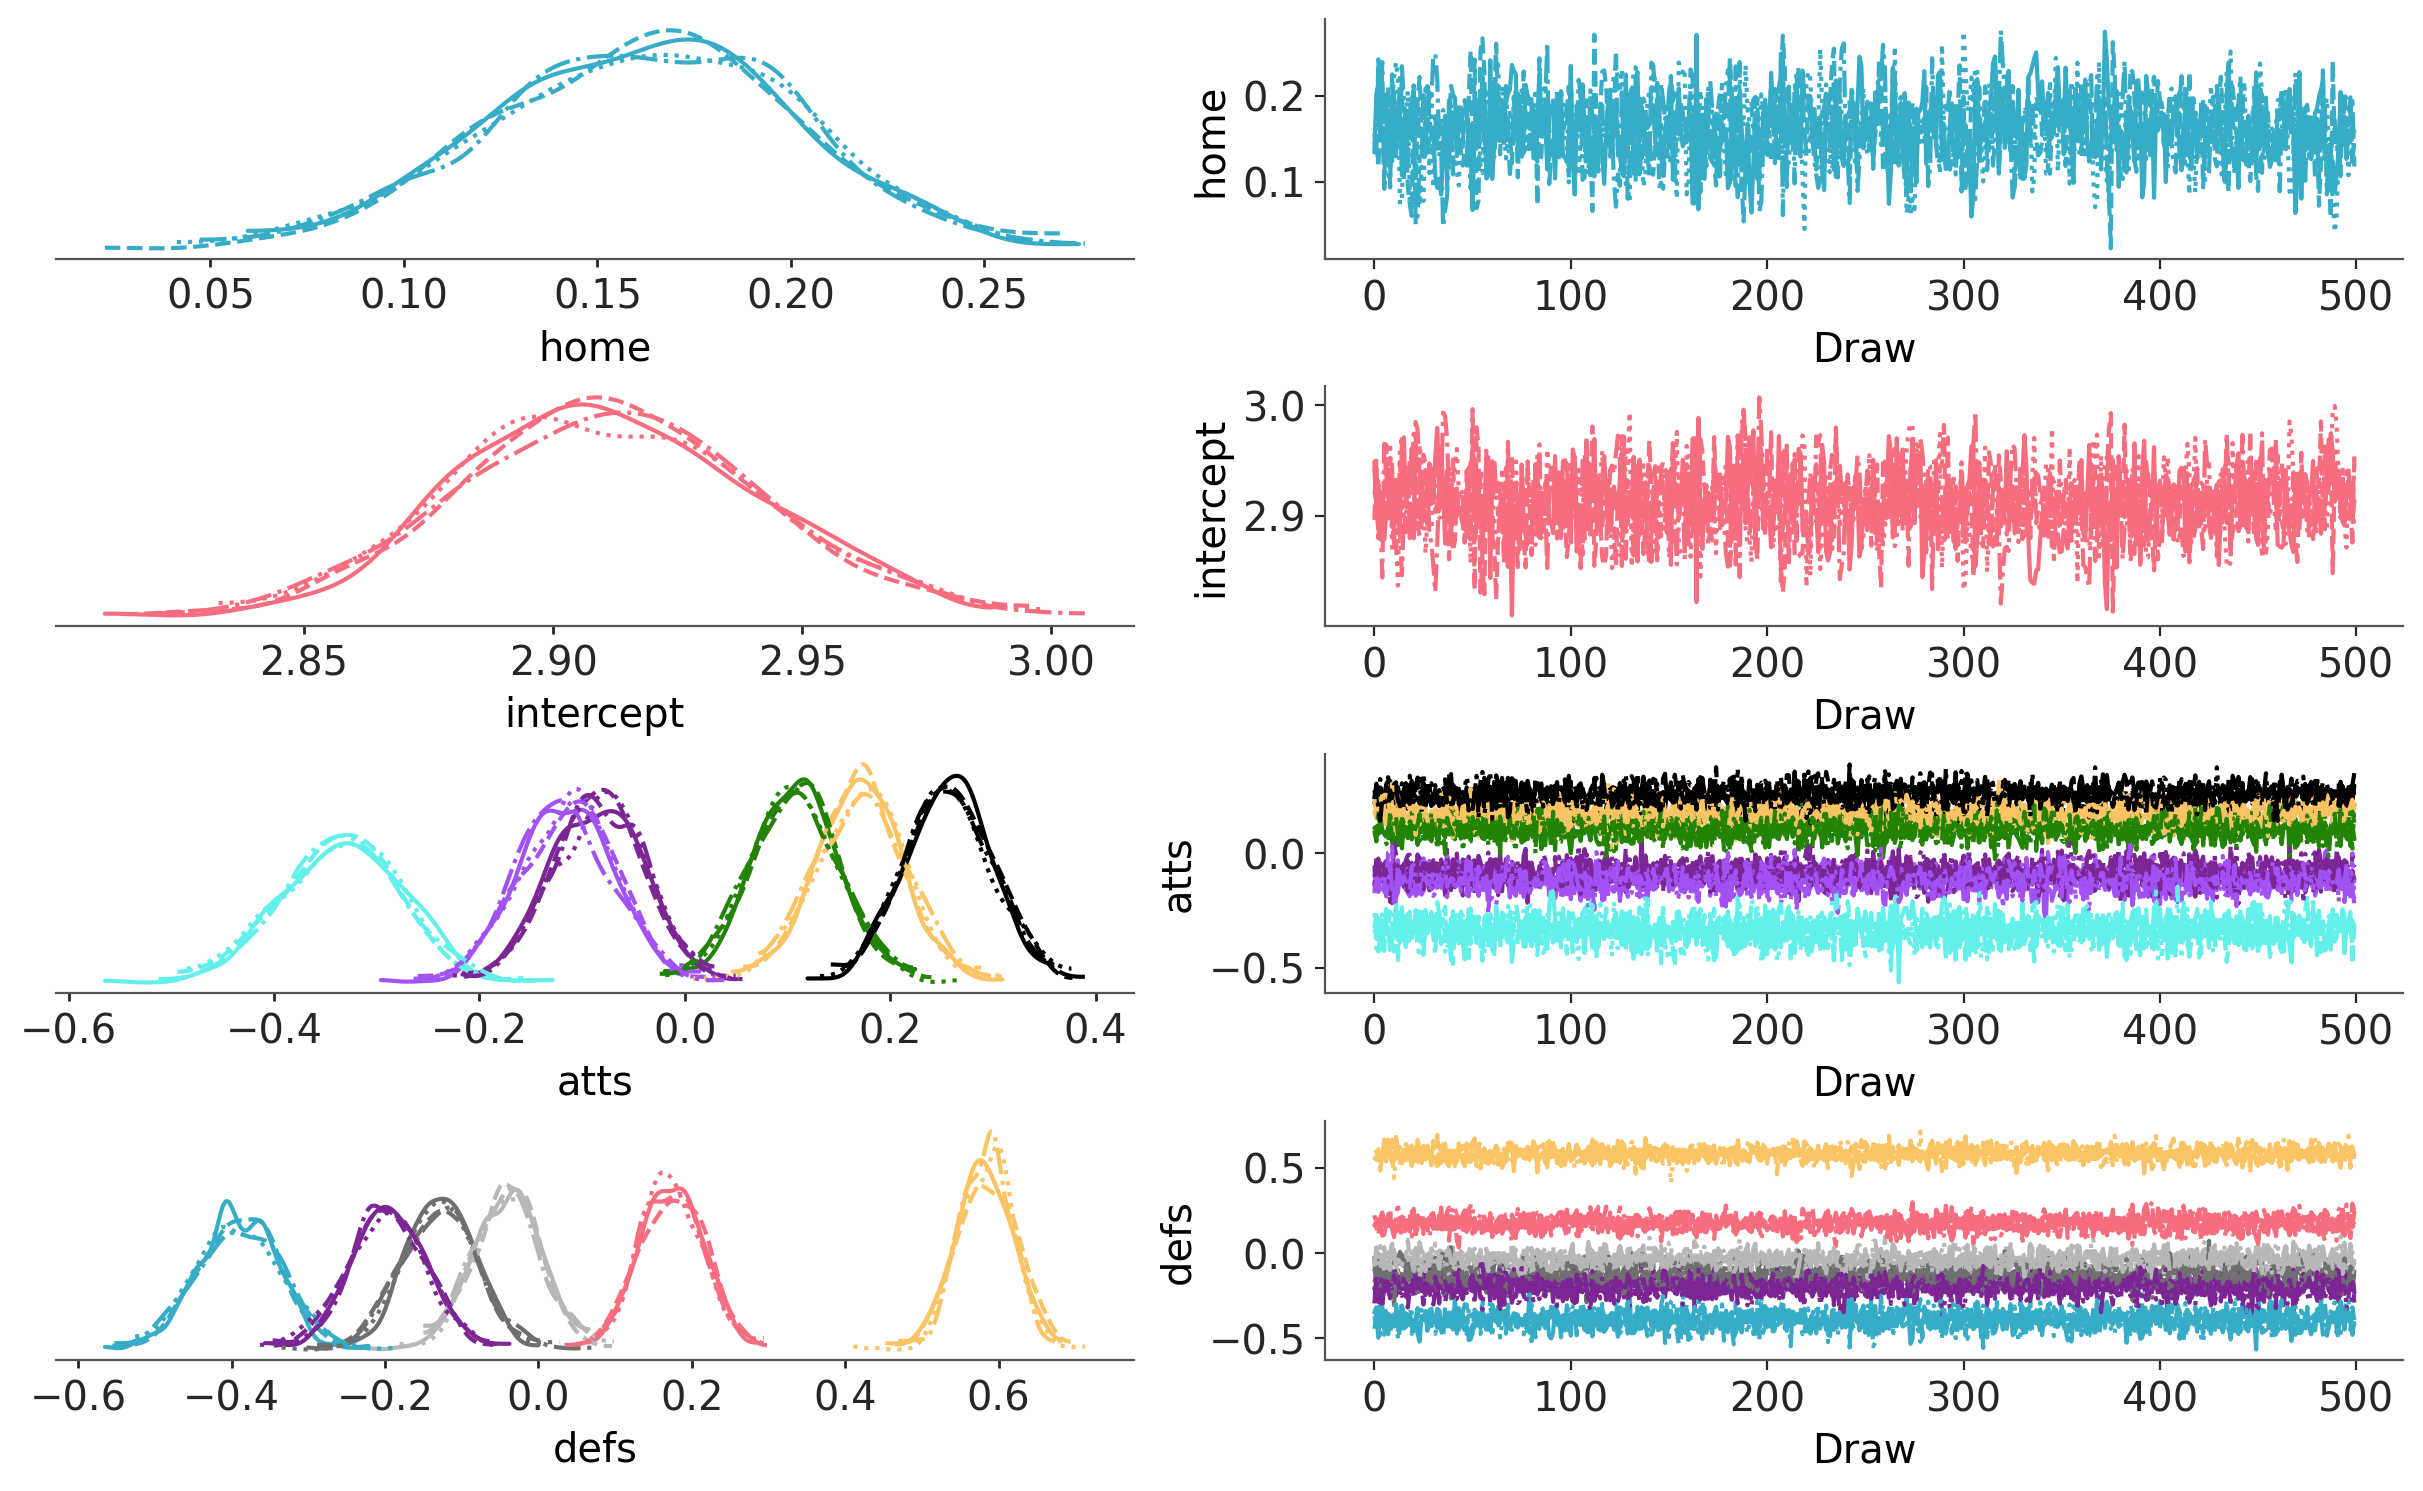

In [8]:
pc = plot_trace_dist(idata, var_names=["home", "intercept", "atts", "defs"])

In case it wasn't completely clear from the plot (especially without legends that we still haven't seen), inspecting the `aes` attribute we can see
that the linestyle depends on the coordinate value of the chain dimension, and the color depends on both the data variable and the team dimension.

In [9]:
pc.aes

<xarray.DataTree>
Group: /
├── Group: /color
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       <U7 28B '#36acc6'
│           intercept  <U7 28B '#f66d7f'
│           atts       (team) <U7 168B '#fac364' '#7c2695' ... '#63f0ea' '#000000'
│           defs       (team) <U7 168B '#6f6f6f' '#b7b7b7' ... '#fac364' '#7c2695'
├── Group: /overlay
│       Dimensions:    (chain: 4, team: 6)
│       Coordinates:
│         * chain      (chain) int64 32B 0 1 2 3
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       (chain) <U10 160B 'overlay_0' 'overlay_1' 'overlay_2' 'overlay_3'
│           intercept  (chain) <U10 160B 'overlay_4' 'overlay_5' 'overlay_6' 'overlay_7'
│           atts       (chain, team) <U10 960B 'overlay_8' 'overlay_9' ... 'overlay_31'
│           defs       (chain, team) <U10 960B 'overlay_32' ... 'overlay_55'
└── Group: /linestyle
        Dimensions:  (chain: 4)
        Coordinates:
          * chain    (chain) int64 32B 0 1 2 3
        Data variables:
            mapping  (chain) <U2 32B '-' '--' ':' '-.'

There is also an extra aesthetic called `overlay` whose value is ignored but being present ensures we'll loop over the right dimensions and draw the expected lines.
This is helpful to plot multiple subsets all with the same visual properties, which is the default behaviour in {func}`~arviz_plots.plot_ppc` or to ensure the plot
behaves as expected even if we ignore some of the default aesthetic mappings like we do in {ref}`this example <plots_intro/ignore_aes_map>`.

## Customizing your `PlotCollection`

### Modify specific visual elements
In order to use global keyword arguments, you can pass them directly if using {meth}`~.PlotCollection.map` or use `plot_kwargs` if using batteries-included functions.
In some cases however we might want more control. One such example could be highlighting the variables that correspond to the national team of Scotland:

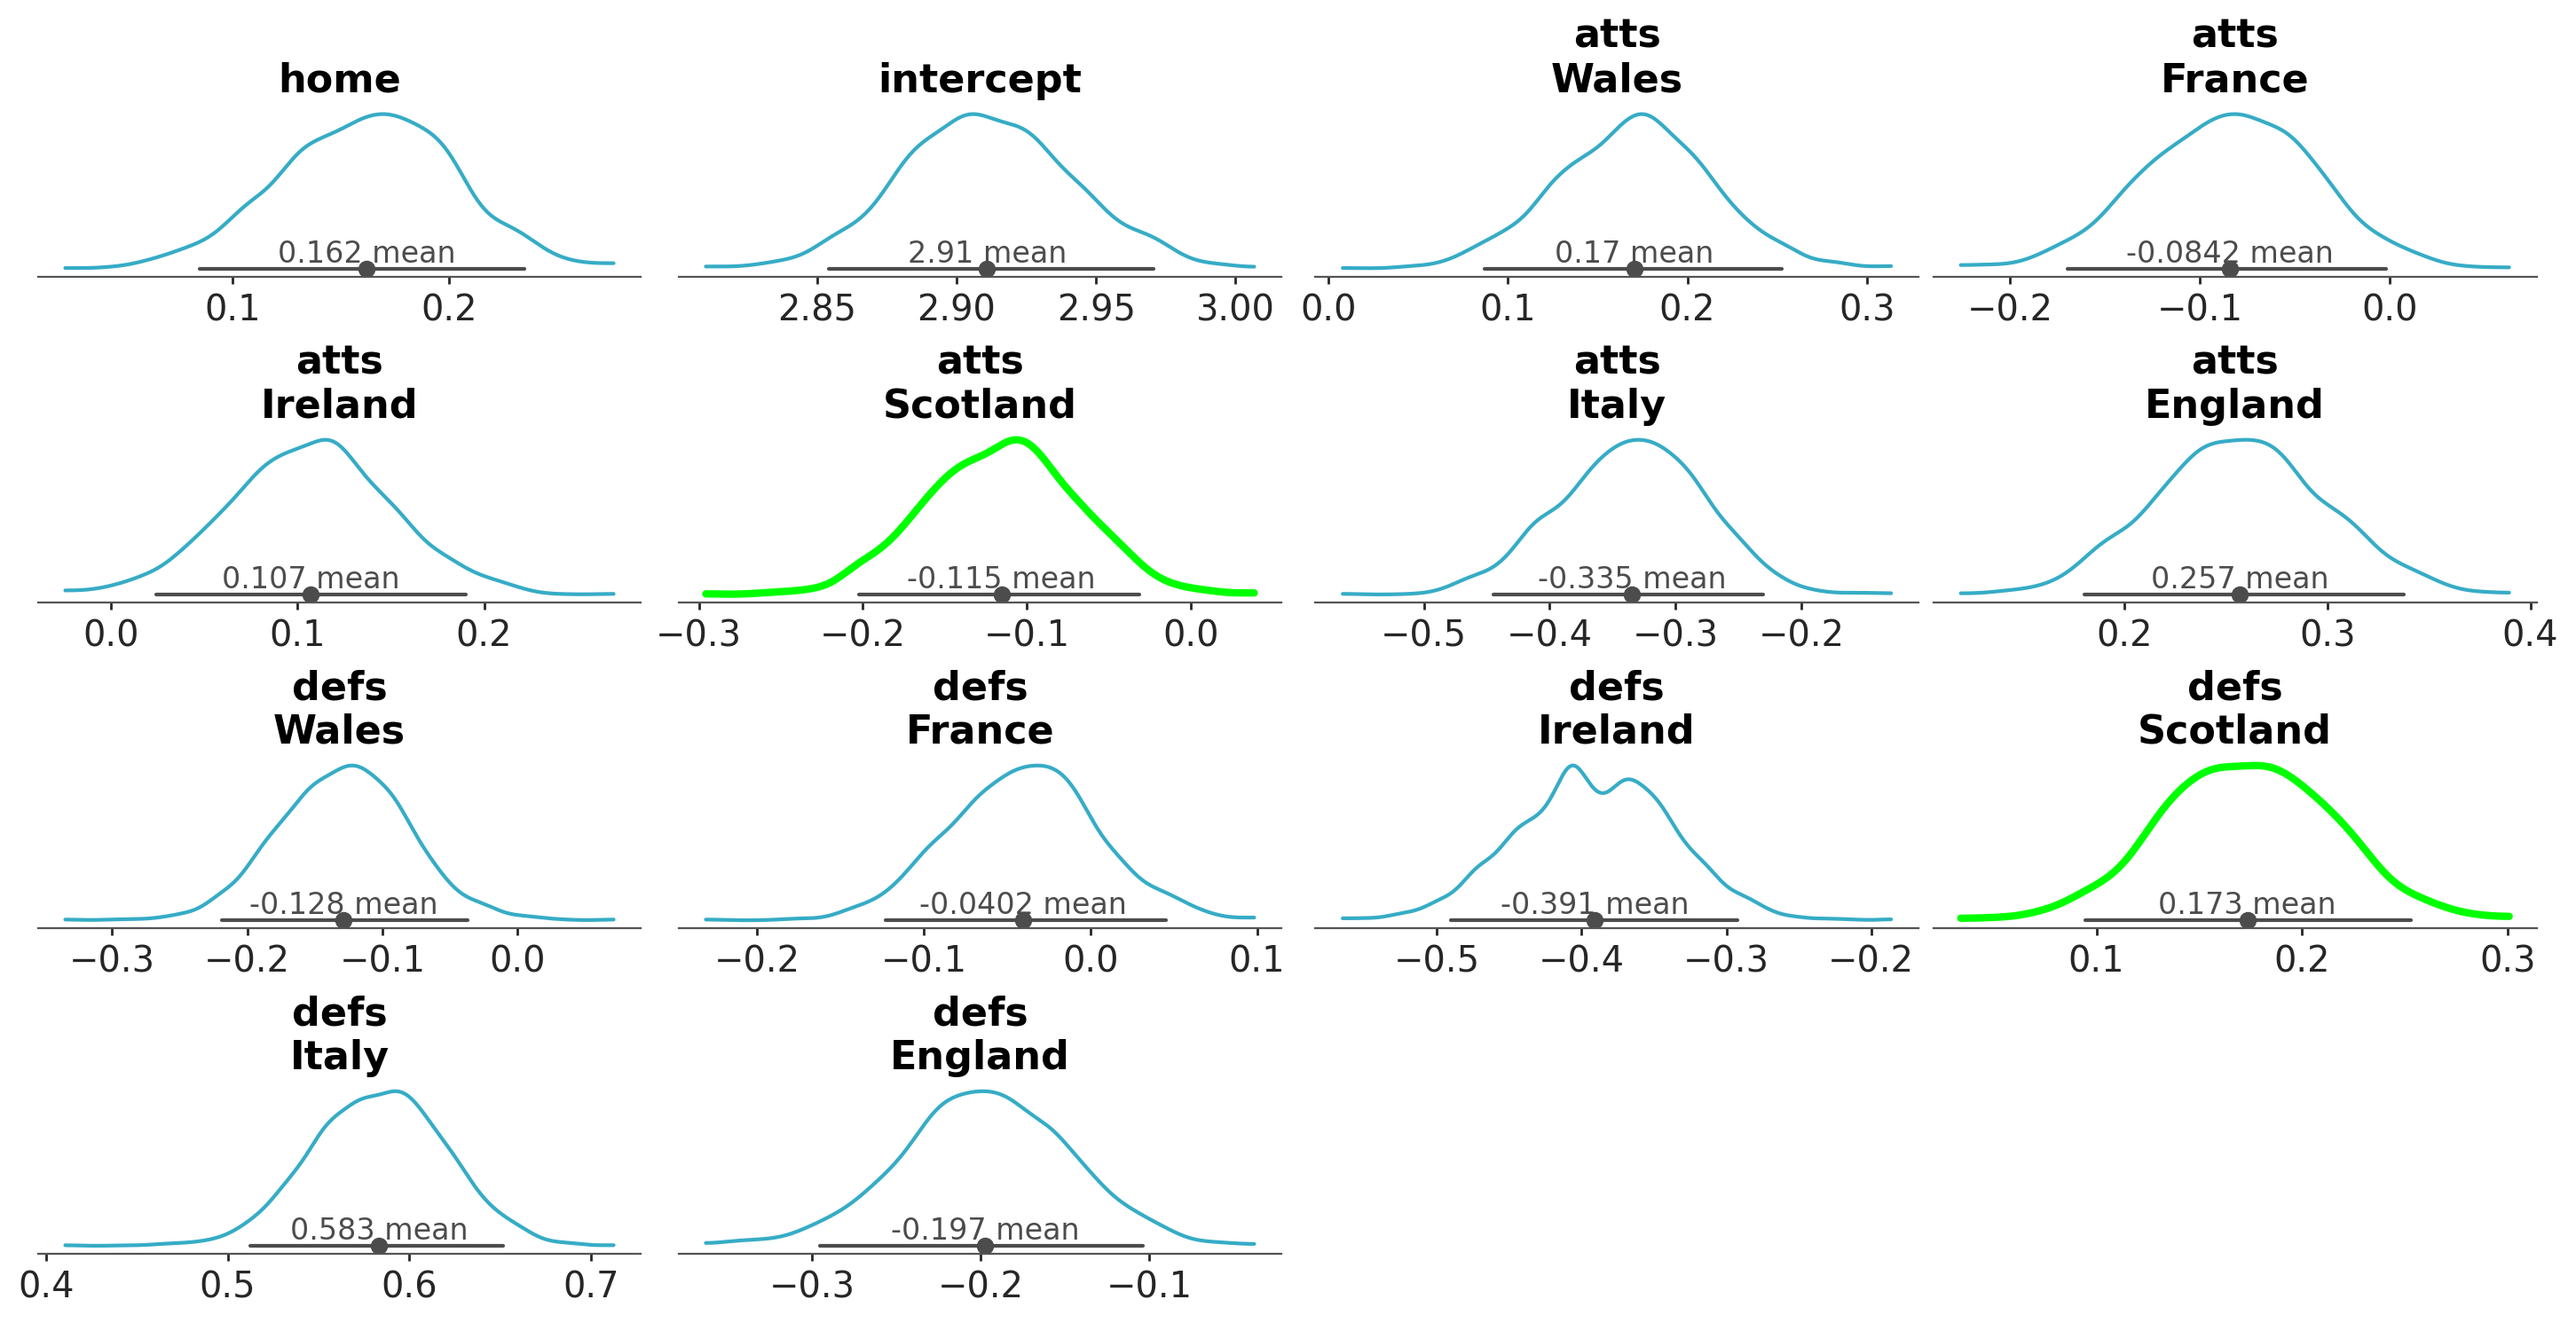

In [10]:
pc = plot_dist(idata, var_names=["home", "intercept", "atts", "defs"])
atts_scotland_kde = pc.viz["kde"]["atts"].sel(team="Scotland").item()
# atts_scotland_kde is now the Line2D object that
# corresponds to the kde line of the coordinate Scotland of variable atts
atts_scotland_kde.set(linewidth=3, color="lime")
pc.viz["kde"]["defs"].sel(team="Scotland").item().set(linewidth=3, color="lime");

Similarly we can also modify {term}`plot` properties, for example, add a grid to the intercept one:

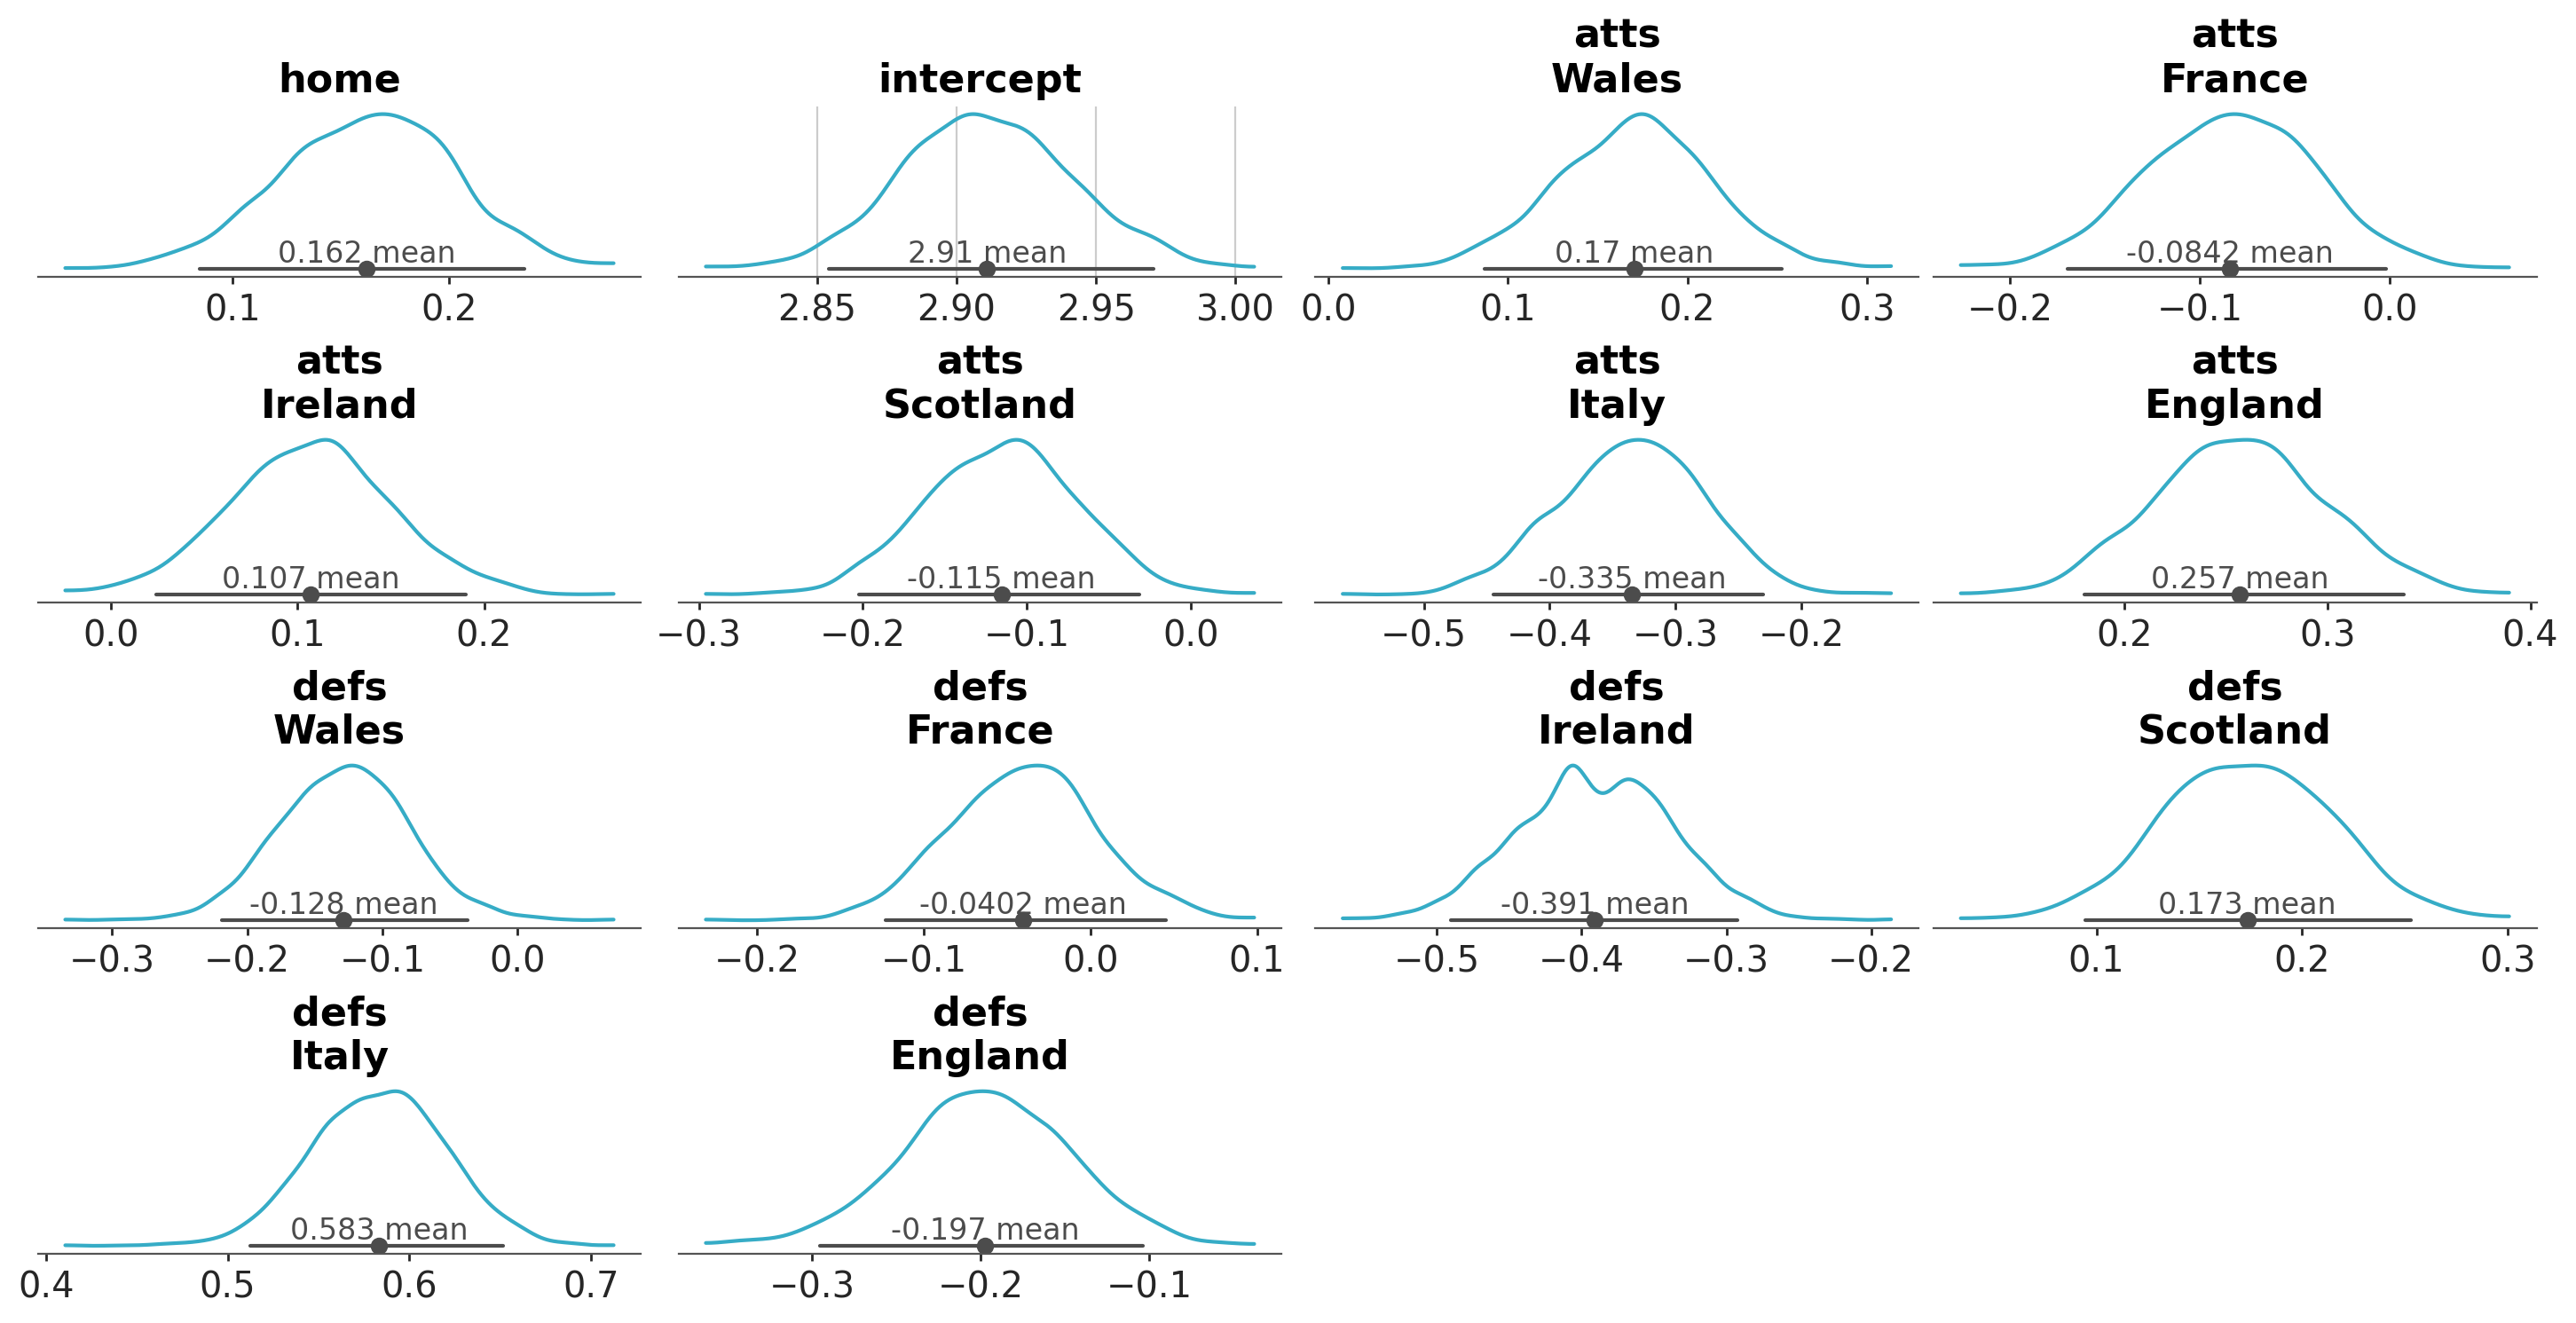

In [11]:
pc = plot_dist(idata, var_names=["home", "intercept", "atts", "defs"])
pc.viz["plot"]["intercept"].item().grid(True)

We can inspect and modify any of the stored elements:

In [12]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [13]:
pc = plot_dist(
    idata,
    var_names=["home", "atts", "defs"],
    backend="bokeh",
    # make plot smaller
    pc_kwargs={"plot_grid_kws": {"figsize": (1300, 600), "figsize_units": "dots"}},
)
pe_glyph = pc.viz["point_estimate"]["atts"].sel(team="Italy").item().glyph
pe_glyph.fill_color = "red"
pe_glyph.size = 20
pc.show()

We can also use the `row` and `col` indexes to select elements based on their position in the plot grid, not using their coordinates.

:::{note} Selection with row and column is a bit more convoluted that it might need to be, but this also serves to illustrate an important issue.
Some operations on the DataTree/Dataset/DataArray objects will trigger copies, which don't play well with neither bokeh nor matplotlib.

Here for example, attempting to use `.where(condition, drop=True)` which would make things more direct will trigger a copy and because of that an error
on the plotting backend side.
:::

In [14]:
pc = plot_dist(
    idata,
    var_names=["home", "atts", "defs"],
    backend="bokeh",
    # make plot smaller
    pc_kwargs={"plot_grid_kws": {"figsize": (1300, 600), "figsize_units": "dots"}},
)

team_at_row2_col1 = pc.viz["plot"]["defs"].where(
    (pc.viz["row_index"]["defs"] == 2) & (pc.viz["col_index"]["defs"] == 1)
).idxmax("team").item()
kde_glyph = pc.viz["kde"]["defs"].sel(team=team_at_row2_col1).item().glyph
kde_glyph.line_color = "lime"
kde_glyph.line_width = 4
pc.show()

### Extend the `PlotCollection`
Instead of modifying existing visual elements, we might instead want to add more elements to the plots.
If we want to add something to a specific plot, the procedure is basically the same as above with the only difference
of calling a plotting function instead of modifying properties of the existing elements.

For example, let's plot a vertical reference line to the `defs` of the France national team:

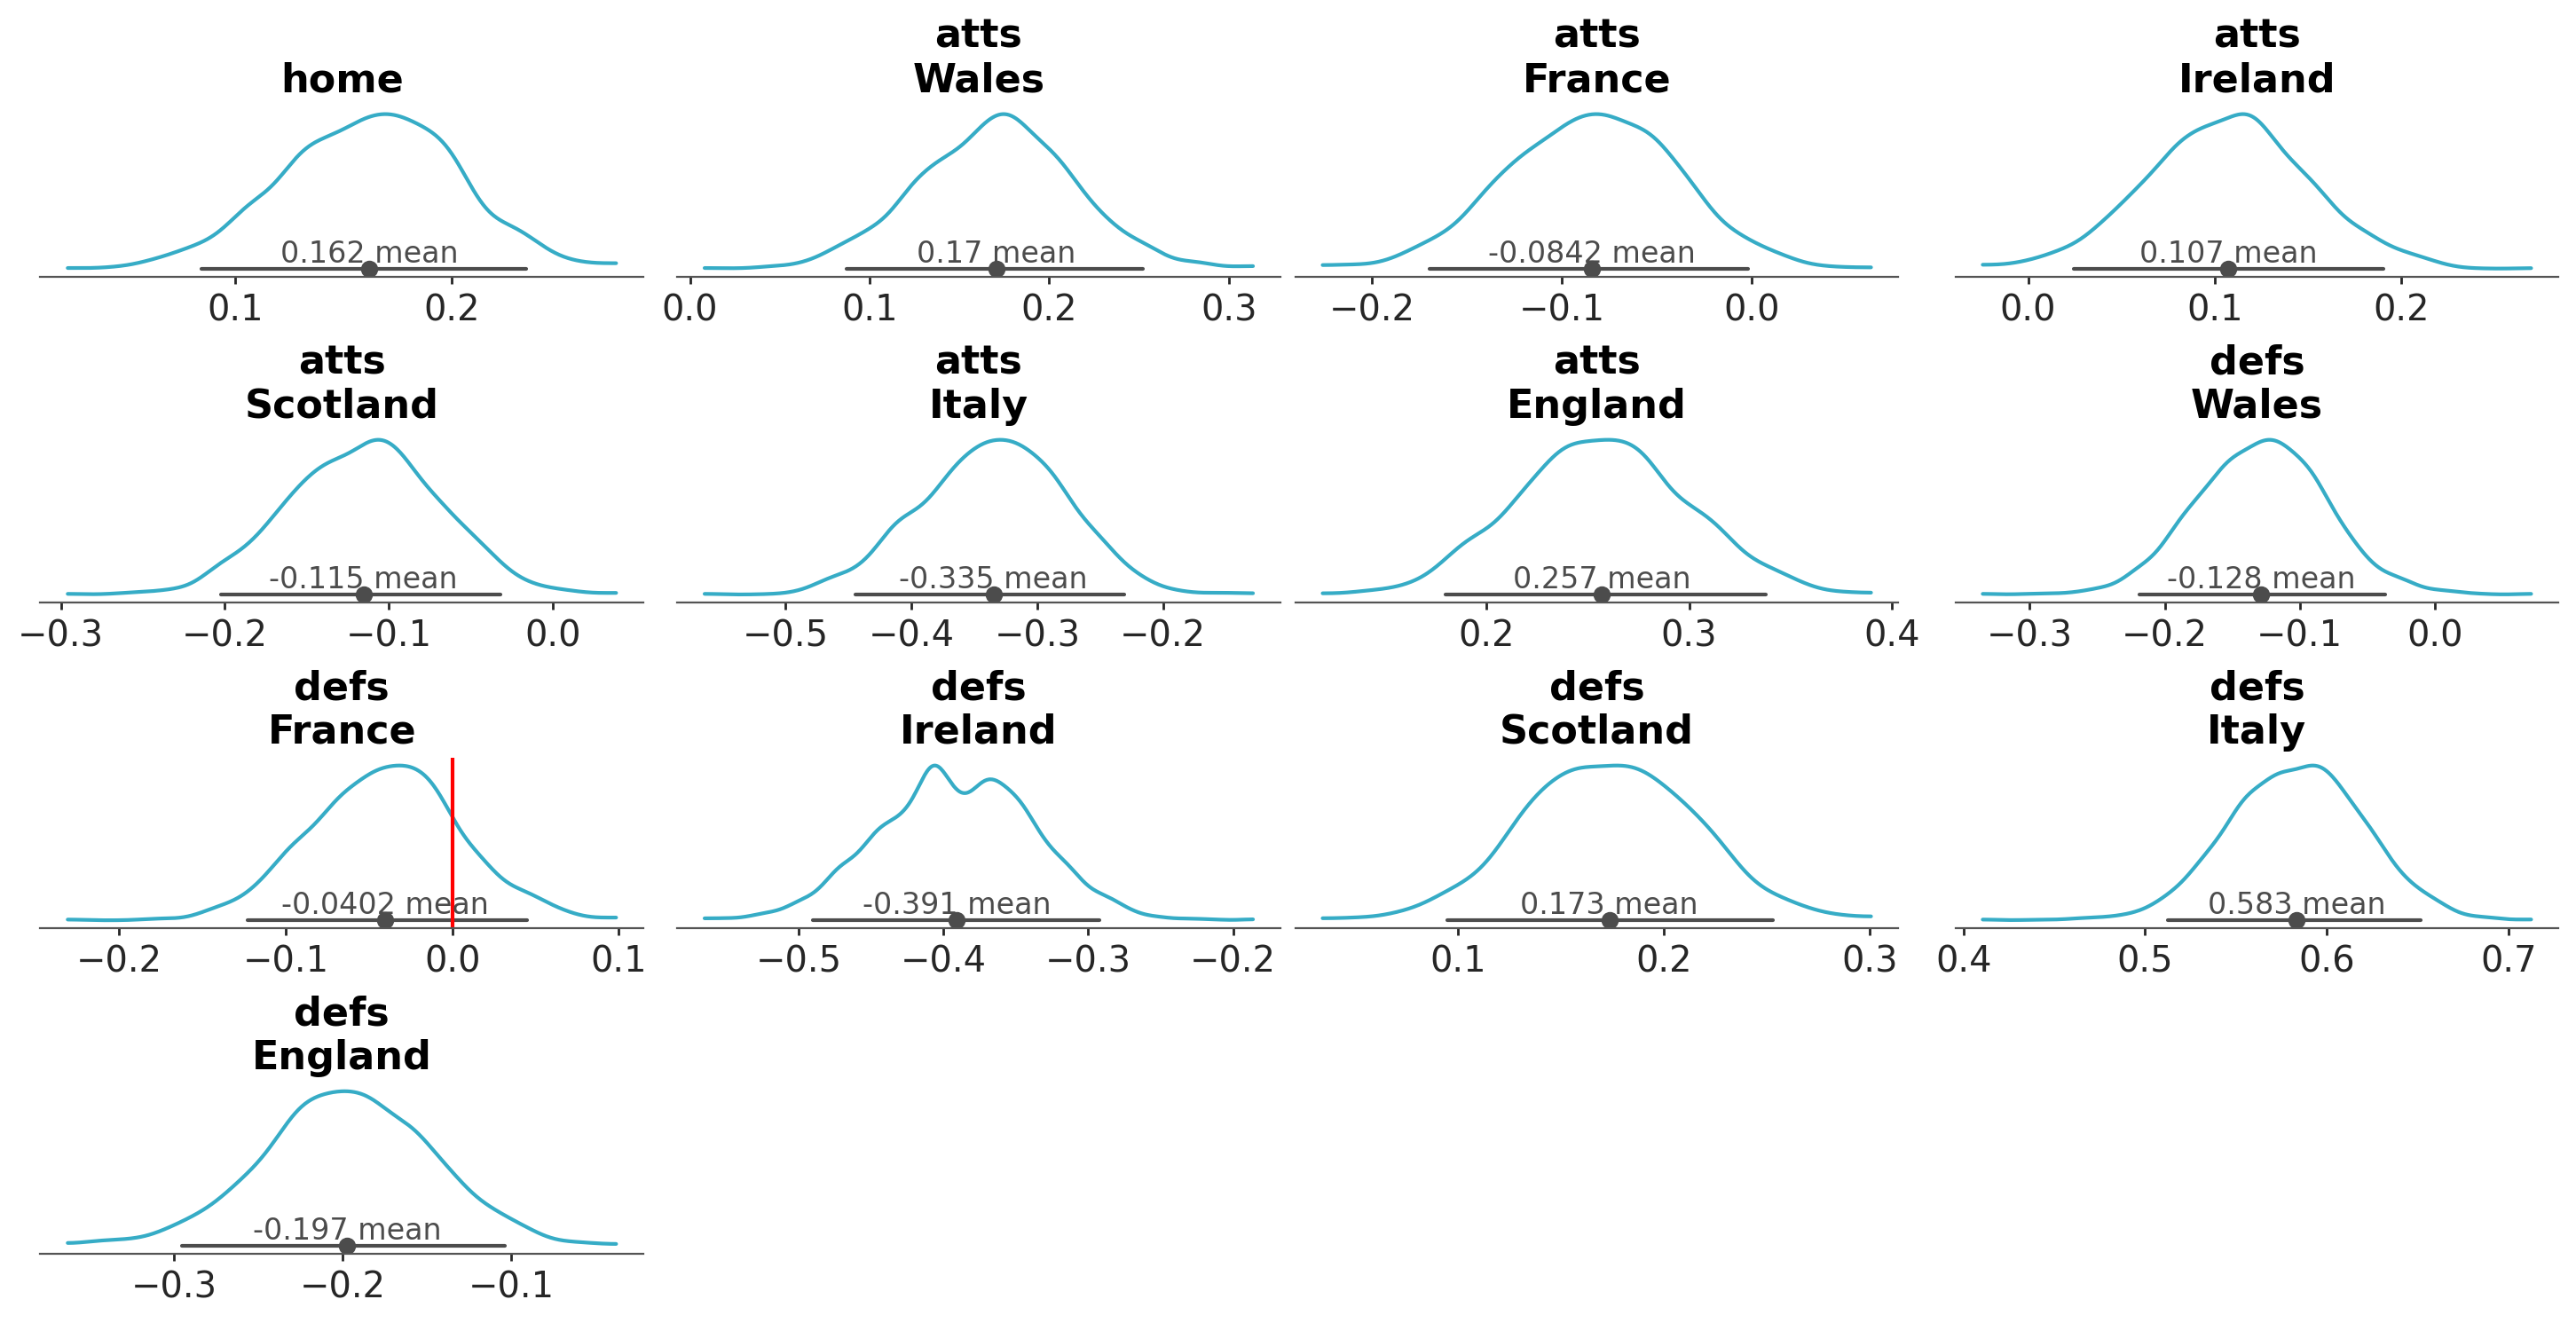

In [15]:
pc = plot_dist(idata, var_names=["home", "atts", "defs"])
pc.viz["plot"]["defs"].sel(team="France").item().axvline(0, color="red");

If we instead want to apply it to all plotting functions, we can use {meth}`~.PlotCollection.map`:

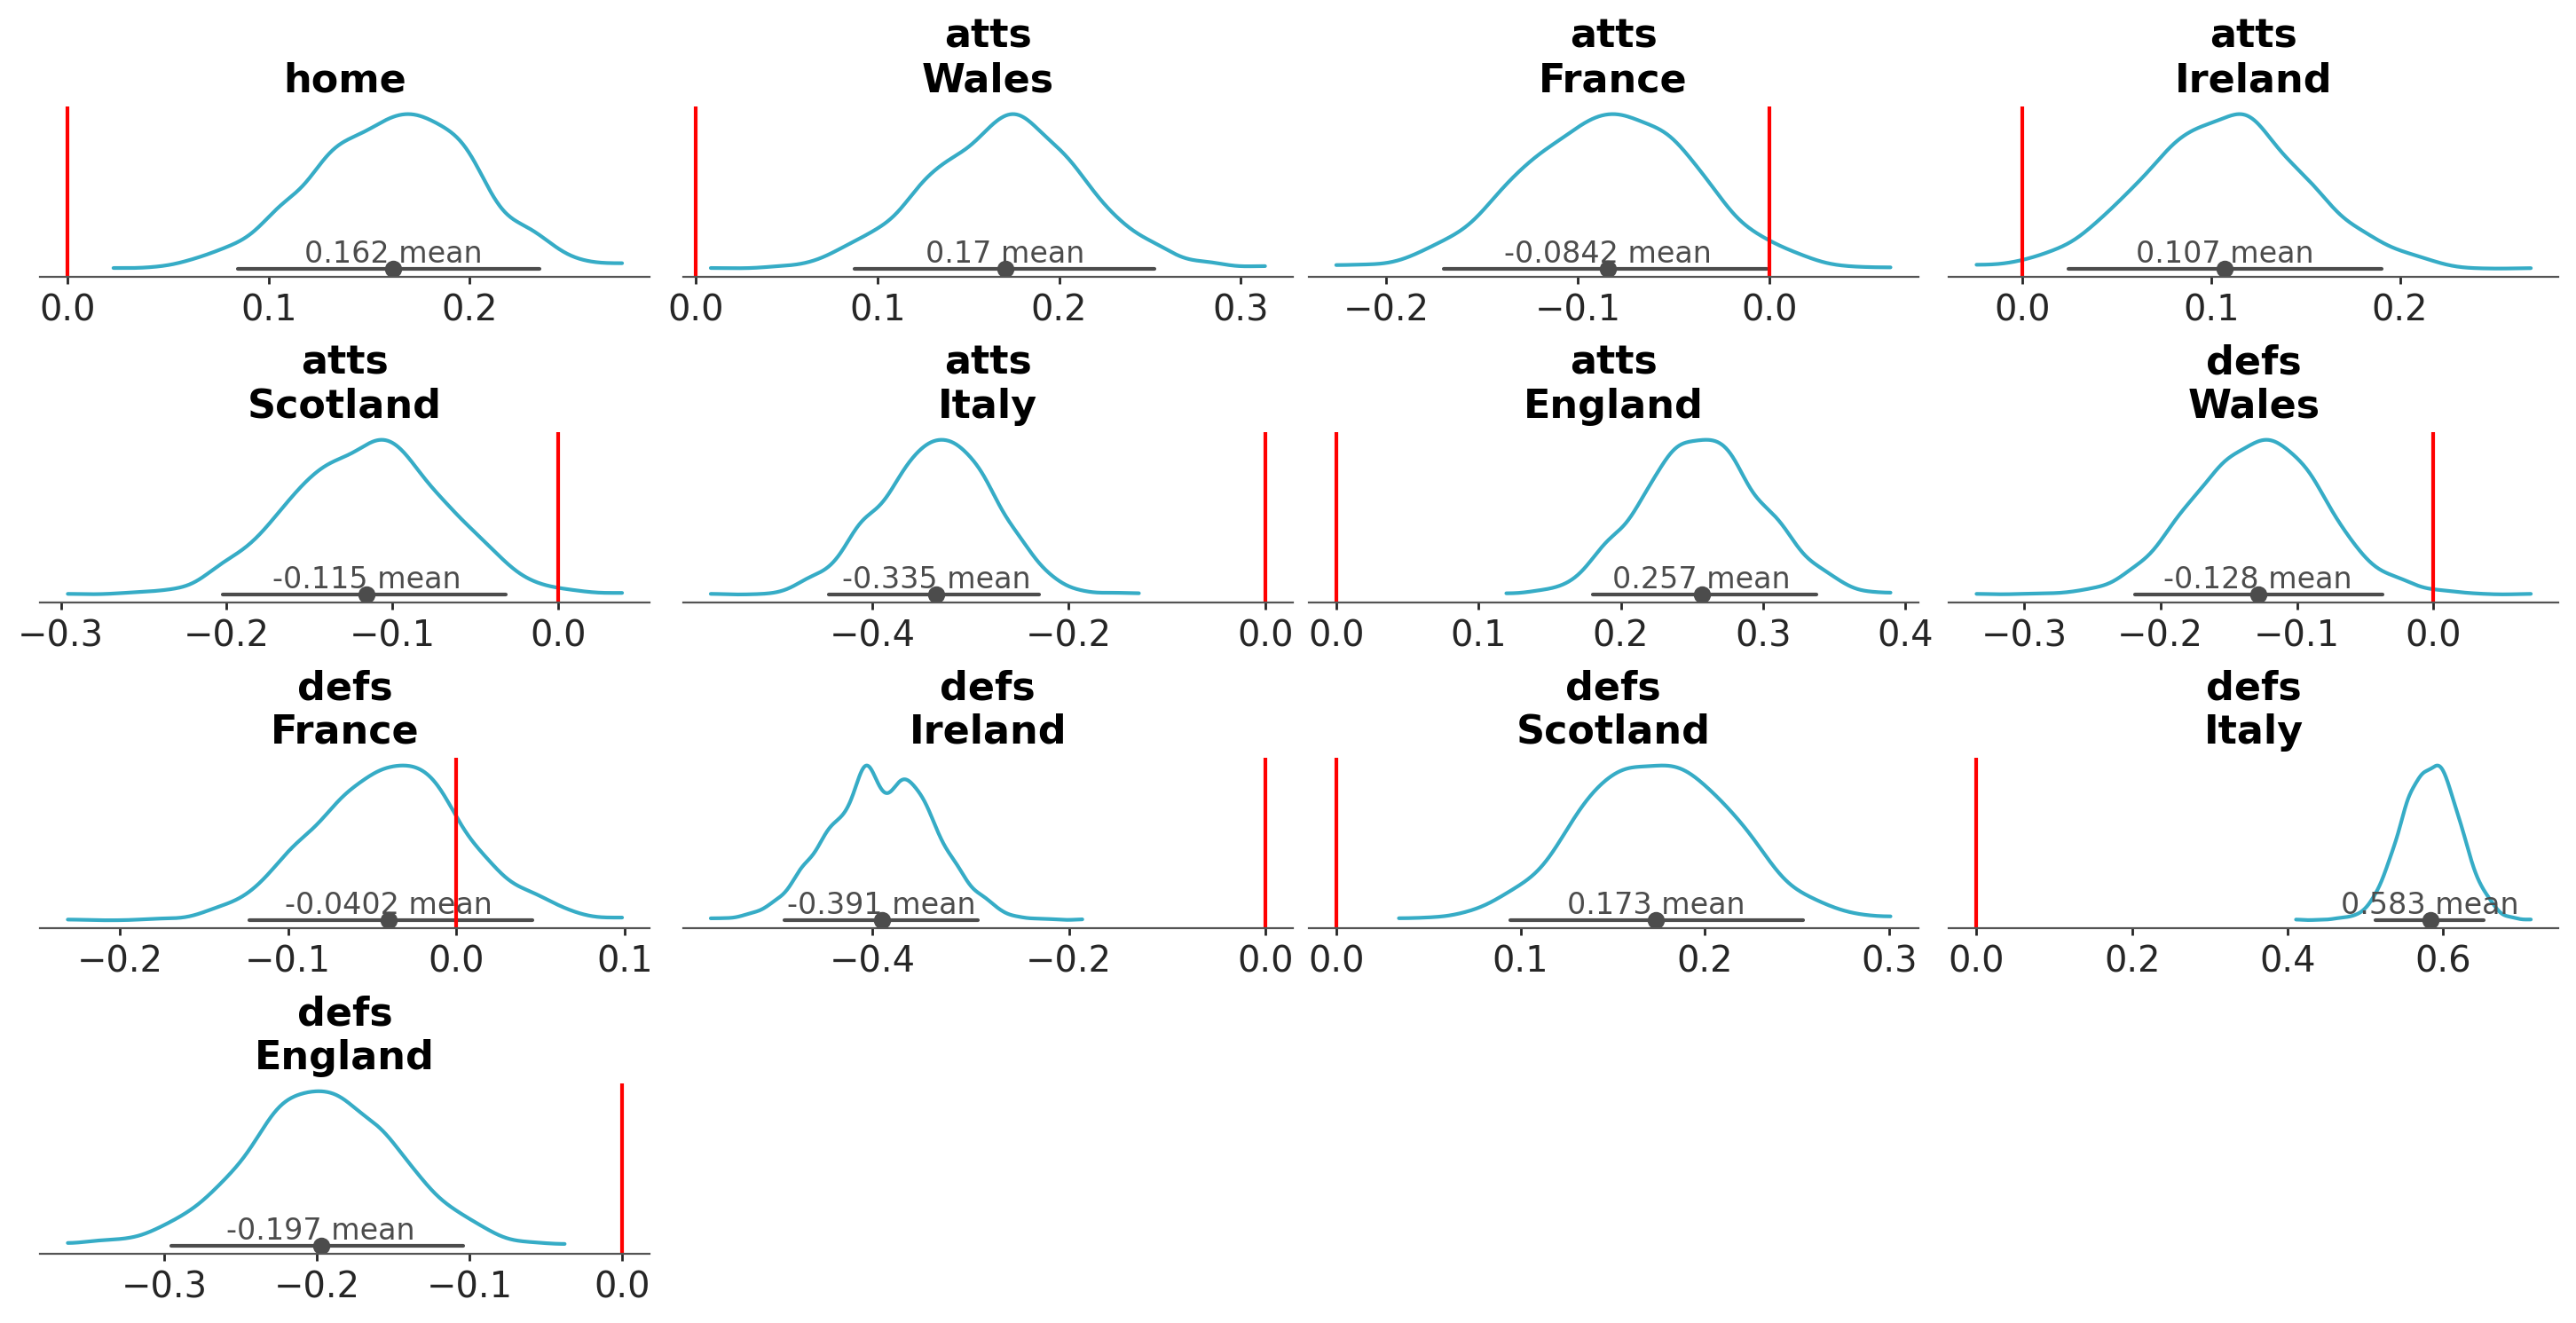

In [16]:
# to be able to use map, callables must accept 3 positional arguments
# a DataArray, the plotting target and the backend
def axvline(da, target, backend, **kwargs):
    return target.axvline(0, **kwargs)

pc = plot_dist(idata, var_names=["home", "atts", "defs"])
pc.map(axvline, color="red")

:::{seealso}
The `map` method is one of the main building blocks provided by `PlotCollection`. The {ref}`compose_own_plot` page covers the use of `map` more extensively.
:::

### Legends
`PlotCollection` also provides a method to automatically generate legends for the plots.

:::{warning} The API of the {meth}`~.PlotCollection.add_legend` method is still quite experimental.
:::

For properties that are shared for all variables, generating the legend is relatively straightforward as it is unique and using the dimension name as title is a sensible choice.

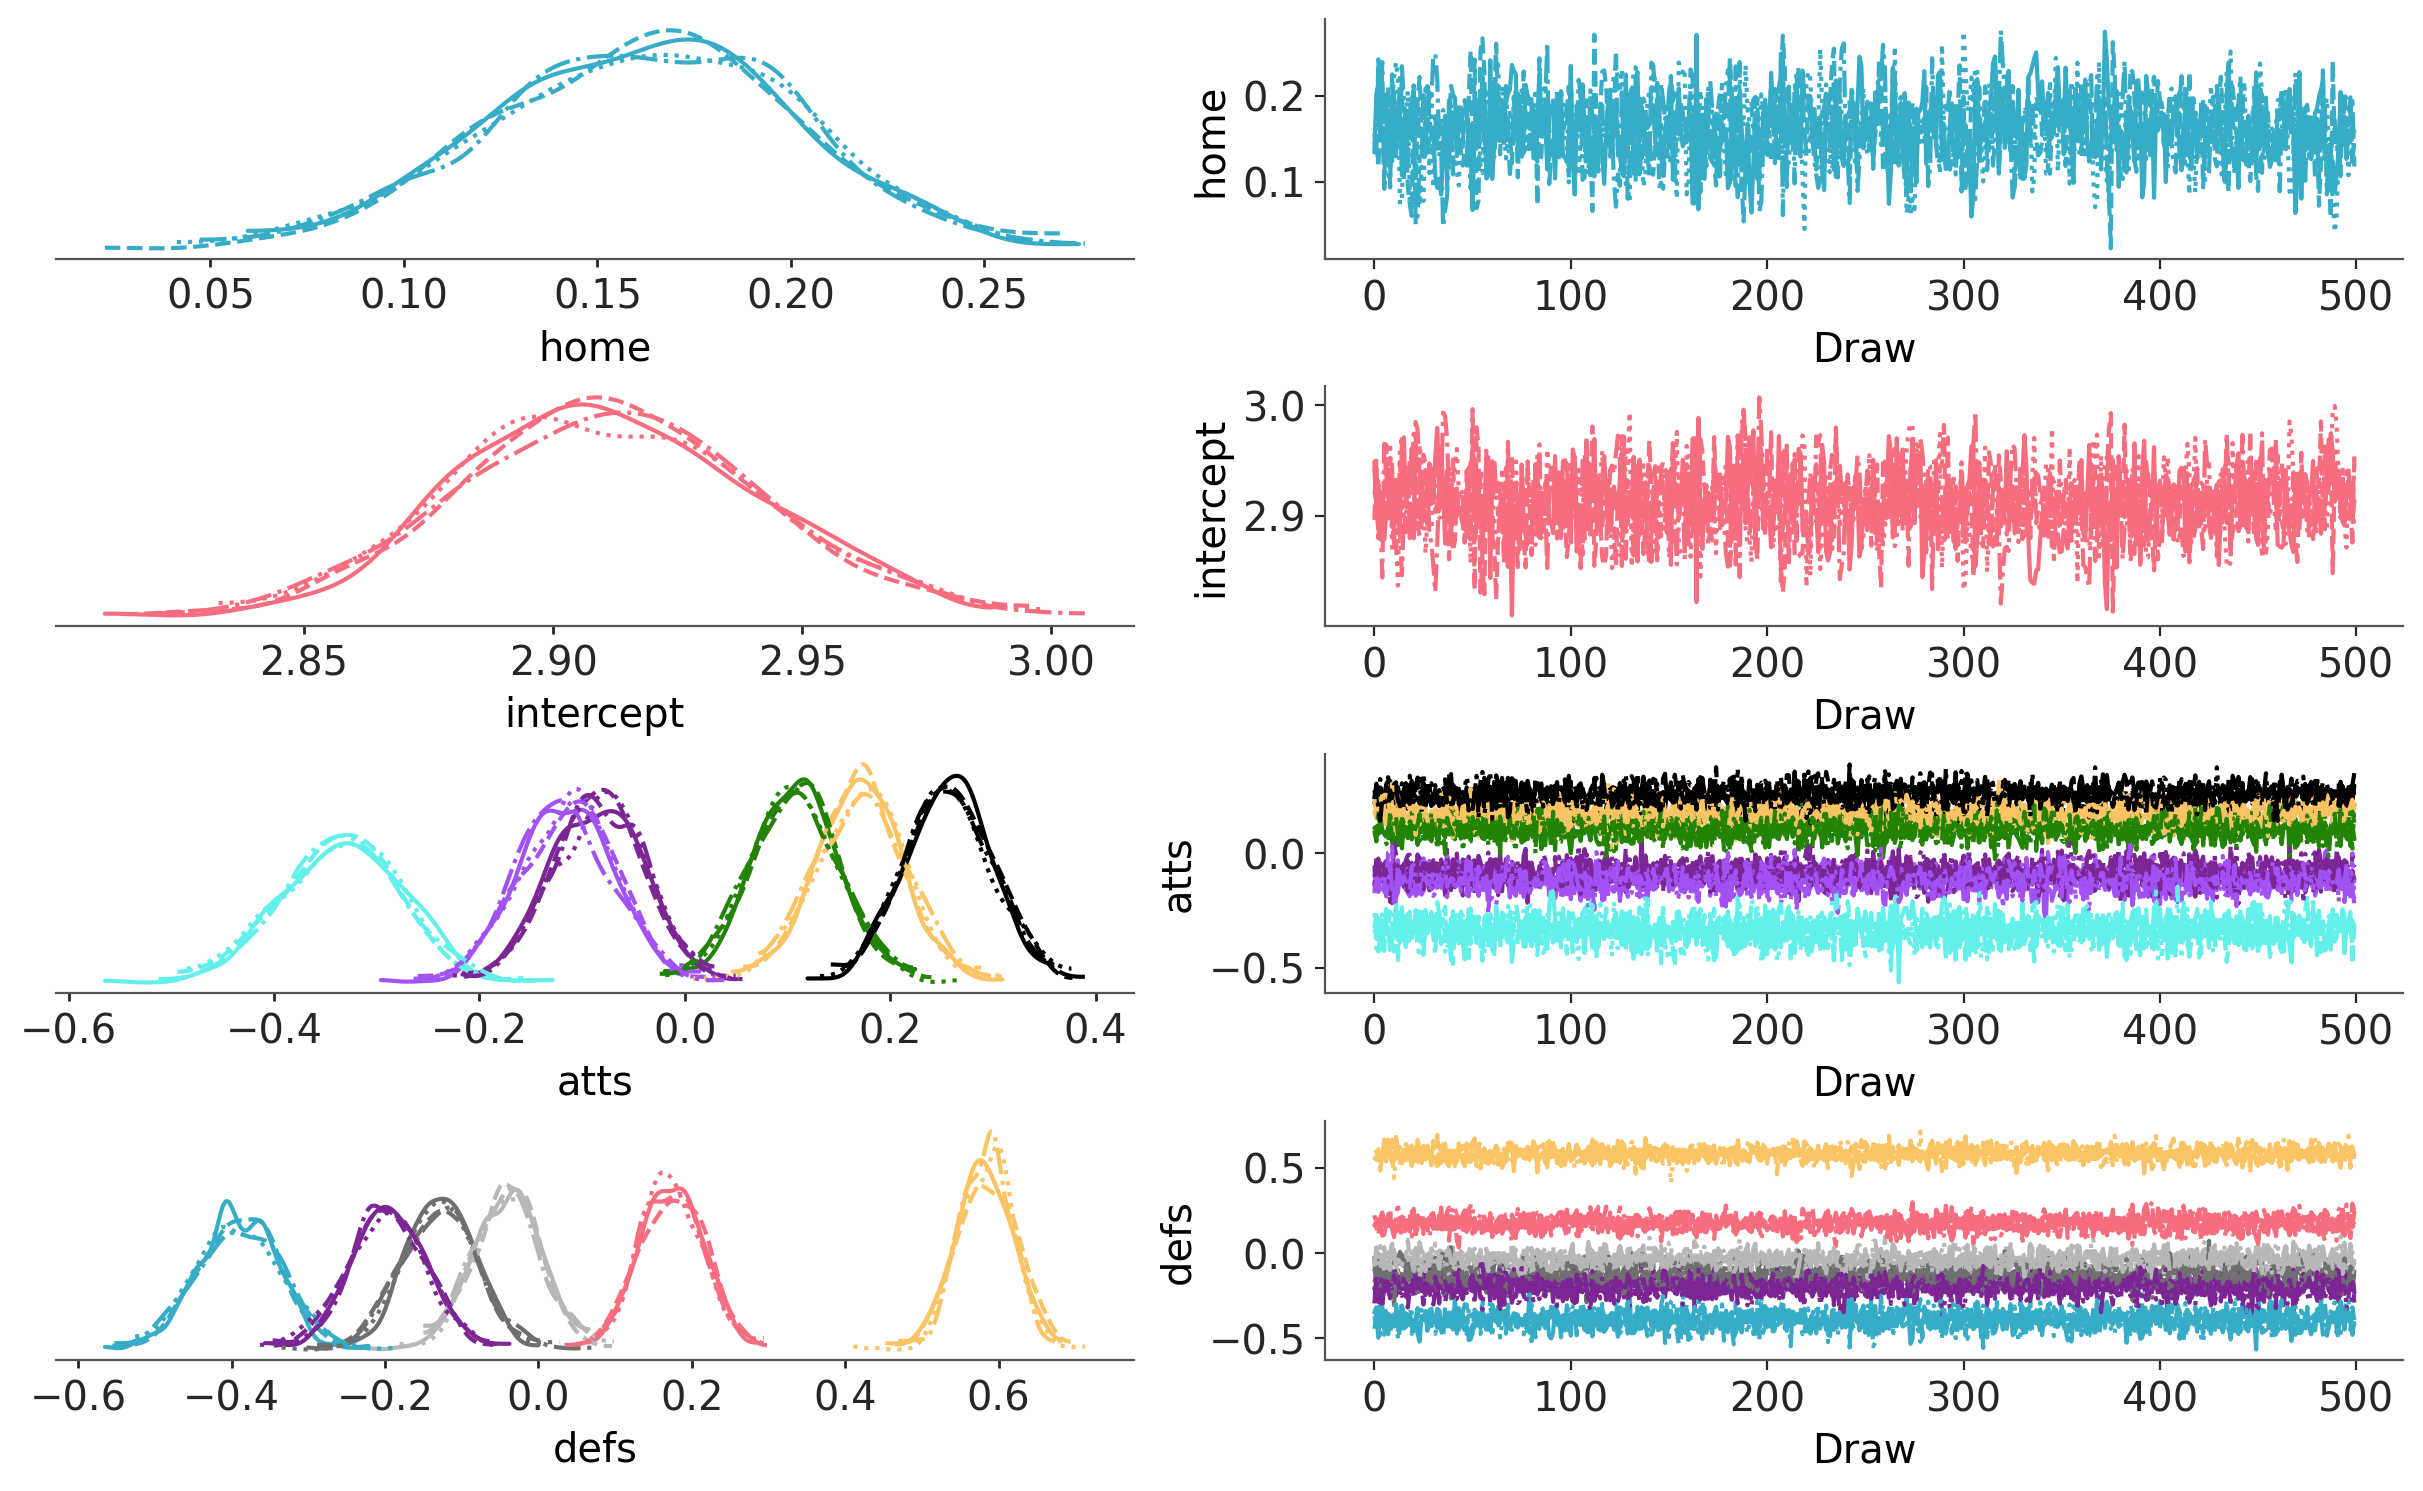

In [17]:
pc = plot_trace_dist(idata, var_names=["home", "intercept", "atts", "defs"])
pc.add_legend("chain");

It is also possible however to have properties that depend on both the data variable and on one (or even multiple) dimensions. In such cases, like in the example below,
the legend becomes dependent on the data variable of interest, and we should probably generate two legends. Or none at all, note that here the color is mostly used to help us visually cluster the multiple KDEs the correspond the same coordinate values, not so much as a way to encode information.

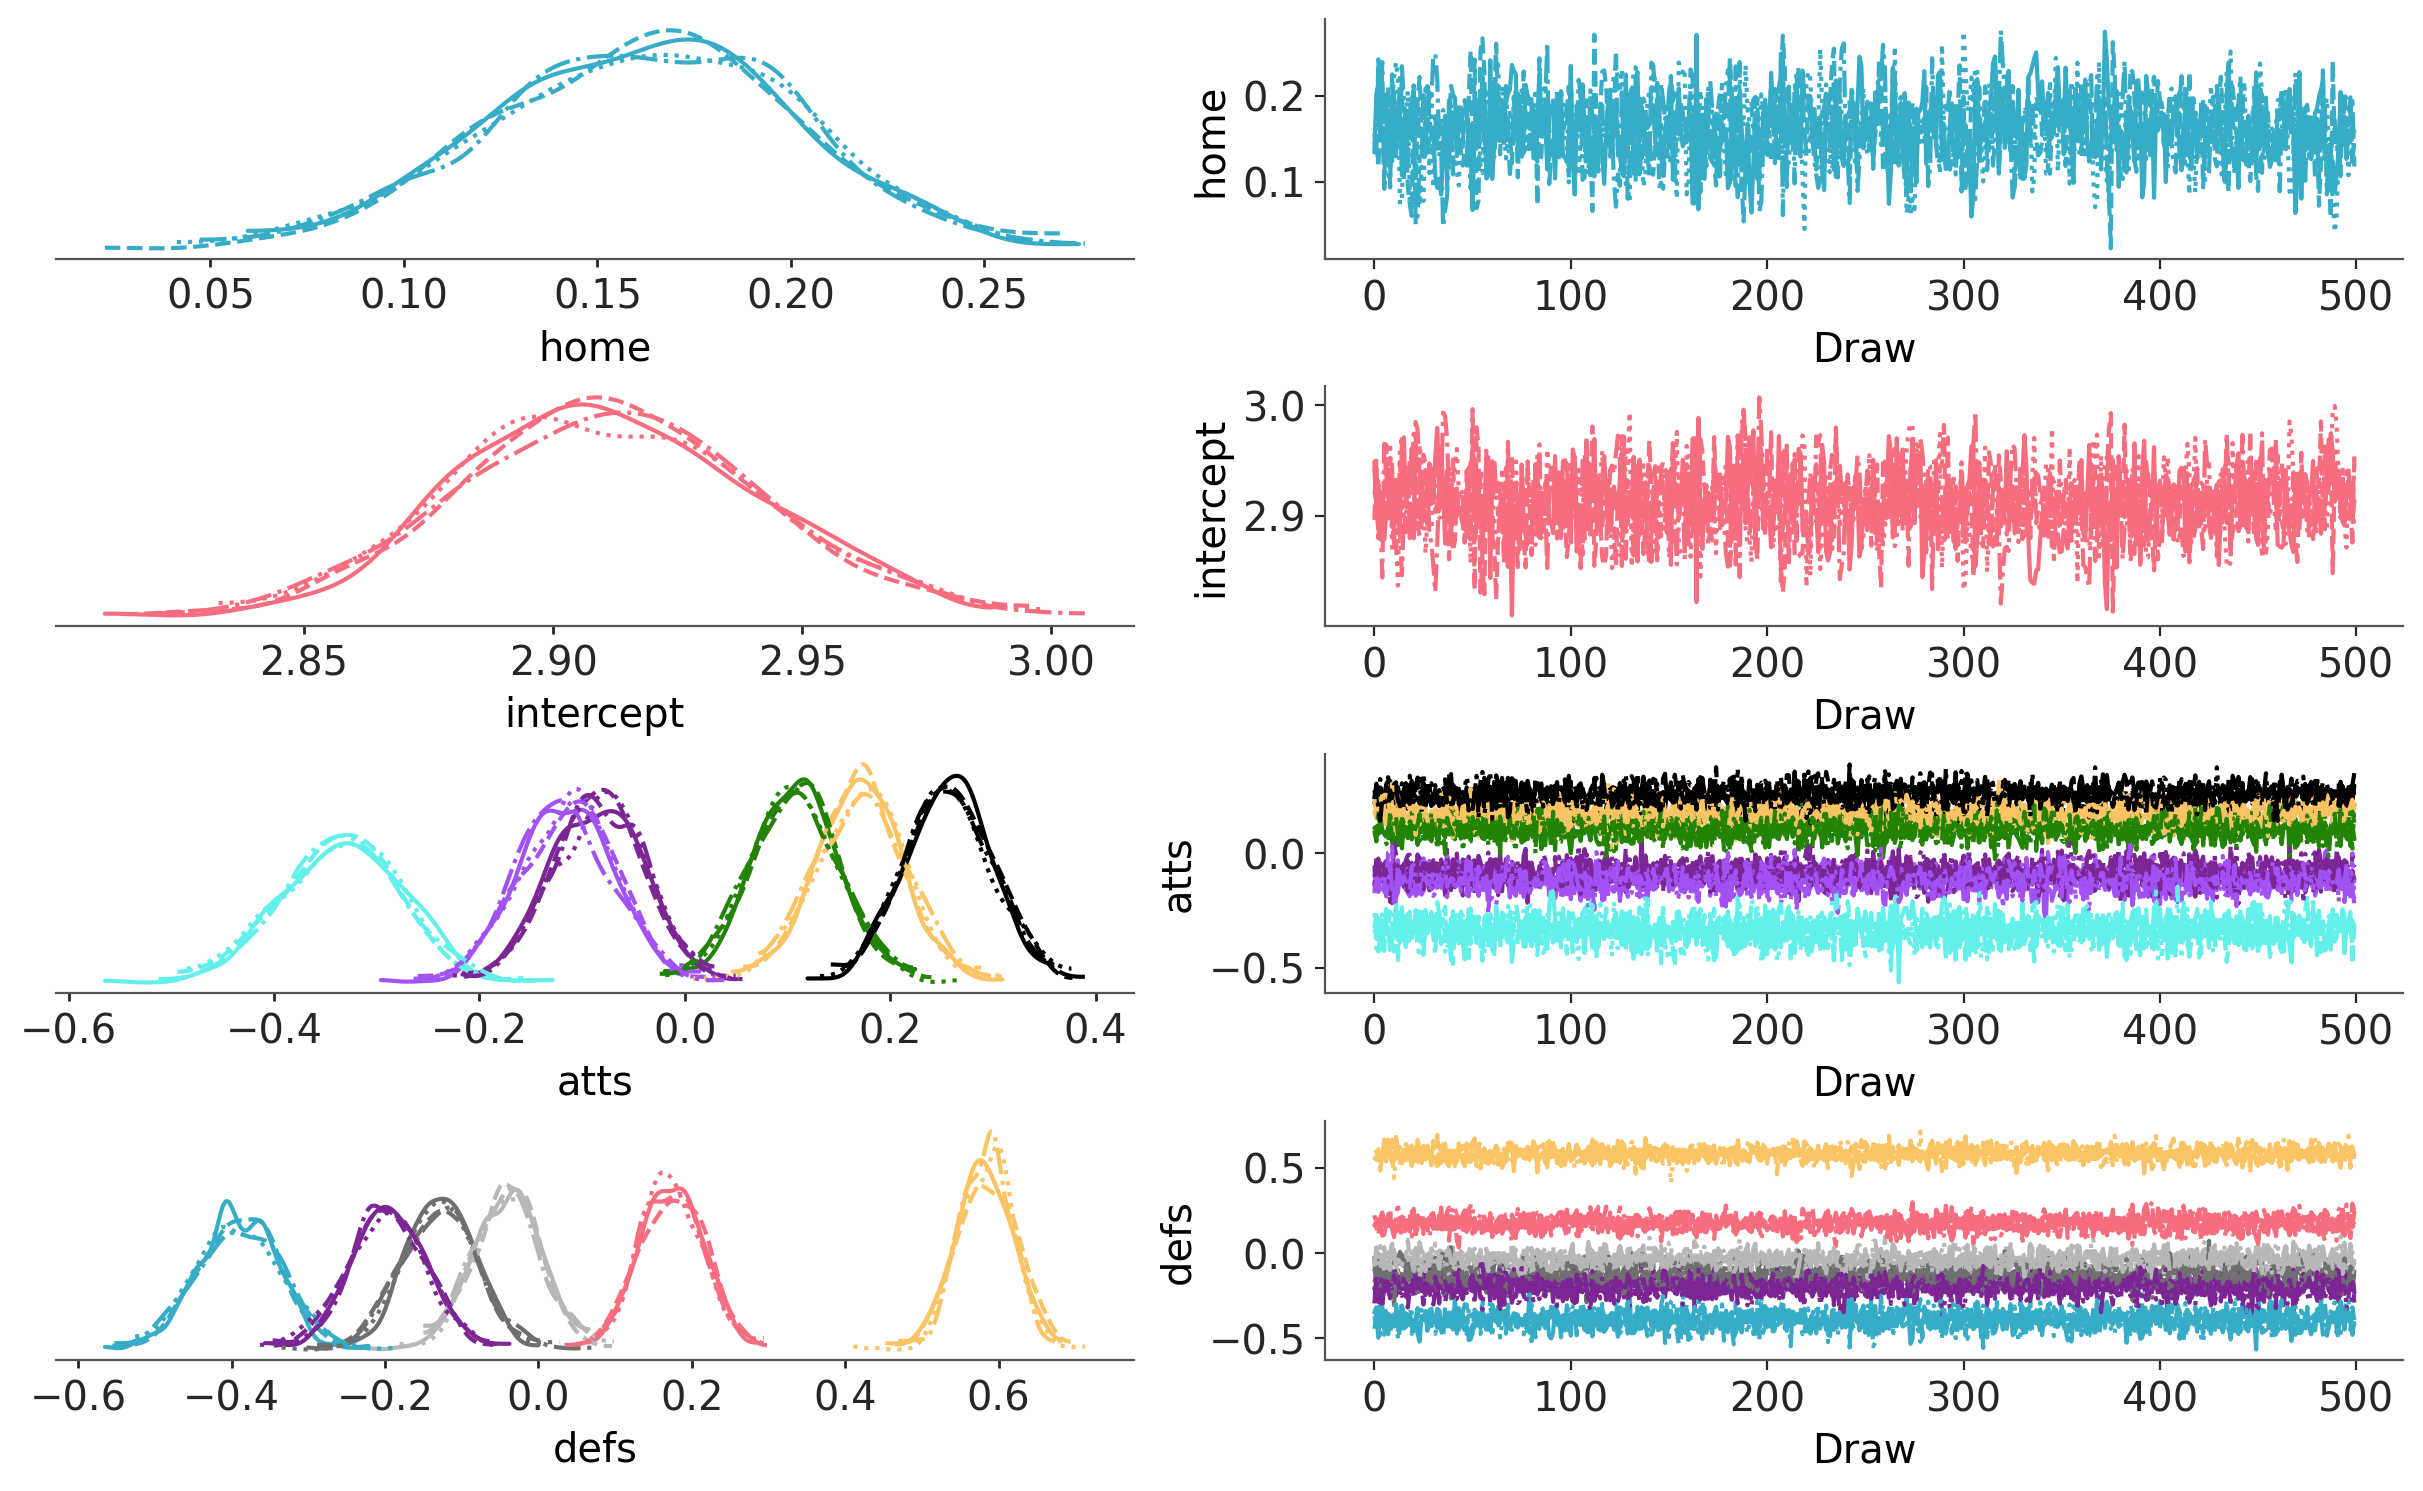

In [18]:
pc = plot_trace_dist(
    idata,
    var_names=["home", "intercept", "atts", "defs"],
)
pc.add_legend("team", var_name="atts", title="team (atts)", loc="outside lower right", fontsize=10, ncols=3)
pc.add_legend("team", var_name="defs", title="team (defs)", loc="outside lower left", fontsize=10, ncols=3);